# 1. 문제 정의

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data/train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/data/test_data.csv')
df_dict = pd.read_csv('/content/drive/MyDrive/data/train_data_dictionary.csv')
test_label = pd.read_csv('/content/drive/MyDrive/data/sample_sub.csv')
test = test.merge(test_label, on='case_id')
df_org = pd.concat([df, test], axis=0).reset_index(drop=True)

df.shape

(318438, 18)

### 1 - 1. EDA (데이터 살펴보기)

In [3]:
df_dict

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [4]:
df.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [5]:
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

     |████████████████████████████████| 11.2 MB 4.3 MB/s 
     |████████████████████████████████| 890 kB 27.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.13.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

In [7]:
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [8]:
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
print(df.isna().sum().sum() / len(df) * 100)

1.4586826949045026


In [10]:
# 전체 샘플수의 1.5 % 에 해당하므로 결측값 제거
df.dropna(axis=0, inplace=True)

In [11]:
# case_id 제거
df.drop('case_id', axis=1, inplace=True)

In [12]:
df = df.sample(n=100000, random_state=42).reset_index(drop=True)

In [13]:
# 범주형 데이터 
df.describe(exclude='number').T

,count,unique,top,freq
Hospital_type_code,100000,7,a,44979
Hospital_region_code,100000,3,X,41707
Department,100000,5,gynecology,78392
Ward_Type,100000,6,R,40355
Ward_Facility_Code,100000,6,F,35530
Type of Admission,100000,3,Trauma,48007
Severity of Illness,100000,3,Moderate,55155
Age,100000,10,31-40,20002
Stay,100000,11,21-30,27467


In [14]:
def col_unique(df) : 
  for col in df.columns :
    print(col, ':', df[col].unique())

col_unique(df)

Hospital_code : [ 6 10 11 30 19  7 28 32 29 14 17 21 27 26  2 23  9  5  8 24 13  1 15  3
 18 16 12 25 22 31  4 20]
Hospital_type_code : ['a' 'e' 'b' 'c' 'f' 'd' 'g']
City_Code_Hospital : [ 6  1  2  3  7  4 11  9  5 10 13]
Hospital_region_code : ['X' 'Y' 'Z']
Available Extra Rooms in Hospital : [ 4  3  5  2  8  6  1  7  9 10  0 11 20 12 21]
Department : ['gynecology' 'TB & Chest disease' 'radiotherapy' 'anesthesia' 'surgery']
Ward_Type : ['Q' 'S' 'R' 'P' 'T' 'U']
Ward_Facility_Code : ['F' 'E' 'D' 'A' 'C' 'B']
Bed Grade : [2. 1. 3. 4.]
patientid : [80120 52005 66004 ... 51780 53182  3640]
City_Code_Patient : [15. 25.  8. 11. 10.  1.  6.  4.  5.  2. 12.  3.  9. 23.  7. 21. 24. 14.
 26. 13. 16. 22. 18. 19. 28. 30. 20. 27. 37. 33. 29. 34. 31. 32. 35. 38.
 36.]
Type of Admission : ['Trauma' 'Emergency' 'Urgent']
Severity of Illness : ['Extreme' 'Moderate' 'Minor']
Visitors with Patient : [ 2  4  3  5  6  8  7  9 15 16 14 12 10  1 13 11 24 20 32 18 25 30 21  0
 22 19 23 17]
Age : ['41-50' '21

In [15]:
df.select_dtypes(include=['object']).head()

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
0,a,X,gynecology,Q,F,Trauma,Extreme,41-50,21-30
1,e,X,gynecology,S,E,Trauma,Moderate,21-30,11-20
2,b,Y,gynecology,Q,D,Trauma,Extreme,51-60,31-40
3,c,Z,TB & Chest disease,R,A,Trauma,Minor,71-80,41-50
4,c,Z,gynecology,Q,A,Trauma,Moderate,21-30,41-50


In [16]:
df.nunique()

Hospital_code                           32
Hospital_type_code                       7
City_Code_Hospital                      11
Hospital_region_code                     3
Available Extra Rooms in Hospital       15
Department                               5
Ward_Type                                6
Ward_Facility_Code                       6
Bed Grade                                4
patientid                            58540
City_Code_Patient                       37
Type of Admission                        3
Severity of Illness                      3
Visitors with Patient                   28
Age                                     10
Admission_Deposit                     6403
Stay                                    11
dtype: int64

### 1 - 2. 타겟 정하기

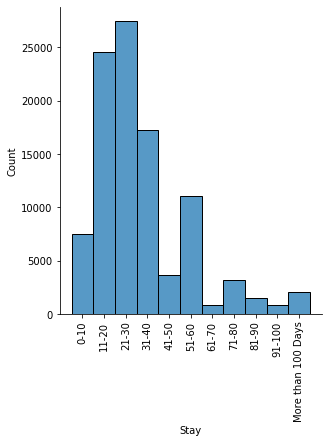

In [17]:
# 타겟의 분포 시각화
sns.displot(df['Stay'].sort_values())
plt.xticks(rotation=90)
plt.show()

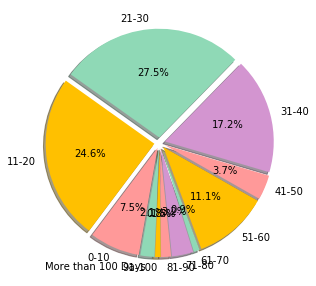

In [18]:
# 타겟의 비율 시각화
plt.figure(figsize=(5, 5))
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(df['Stay'].value_counts().reset_index().sort_values('index')['Stay'].values, labels=df['Stay'].value_counts().reset_index().sort_values('index')['index'].values, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [19]:
# Age, Stay 숫자형 데이터 타입로 변환

# Age 인코딩
def age_enc(df) :
  new_list = []
  for idx in range(df.shape[0]) :
    result = int(df['Age'].iloc[idx][0]) * 10
    new_list.append(result)
  df['Age'] = new_list

# Stay 인코딩
def stay_enc(df) :
  new_list = []
  for idx in range(df.shape[0]) :
    try :
      result = int(df['Stay'].iloc[idx].split('-')[1]) - 5
    except :
      result = 105
    new_list.append(result)
  df['Stay'] = new_list

age_enc(df)
stay_enc(df)

In [20]:
df['Stay'].describe()

count    100000.000000
mean         31.917700
std          21.449686
min           5.000000
25%          15.000000
50%          25.000000
75%          35.000000
max         105.000000
Name: Stay, dtype: float64

### 1 - 3. 피처와 타겟 간의 관계 시각화

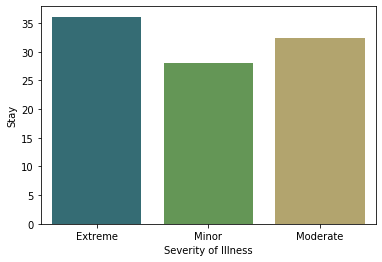

In [21]:
# 중증도별로 재원일수가 유의하게 차이가 날까?
sns.barplot(x='Severity of Illness', y='Stay', data=df.groupby(by=['Severity of Illness']).mean()['Stay'].reset_index(), palette = 'gist_earth');

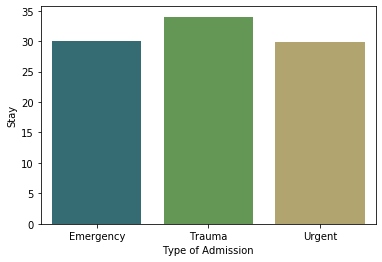

In [22]:
# 입원유형별로 재원일수가 유의하게 차이가 날까? 
sns.barplot(x='Type of Admission', y='Stay', data=df.groupby(by=['Type of Admission']).mean()['Stay'].reset_index(), palette = 'gist_earth');

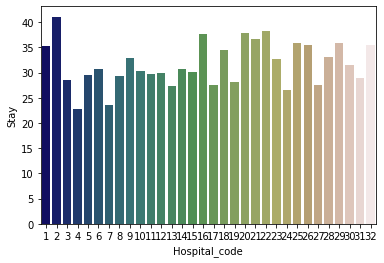

In [23]:
# 병원별로 재원일수가 유의하게 차이가 날까? -> 가설검정
sns.barplot(x='Hospital_code', y='Stay', data=df.groupby(by=['Hospital_code']).mean()['Stay'].reset_index(), palette = 'gist_earth');

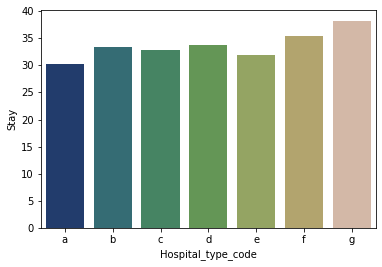

In [24]:
# 병원 유형별로 재원일수가 유의한 차이가 있을까?
sns.barplot(x='Hospital_type_code', y='Stay', data=df.groupby(by=['Hospital_type_code']).mean()['Stay'].reset_index(), palette = 'gist_earth');

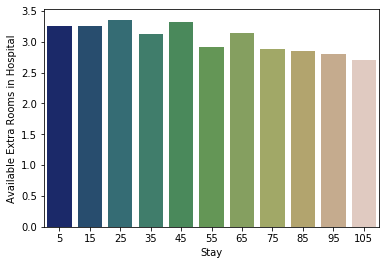

In [25]:
# extra rooms 별로 재원일수가 유의한 차이가 있을까?
sns.barplot(x='Stay', y='Available Extra Rooms in Hospital', data=df.groupby(by=['Stay']).mean()['Available Extra Rooms in Hospital'].reset_index(), palette = 'gist_earth');

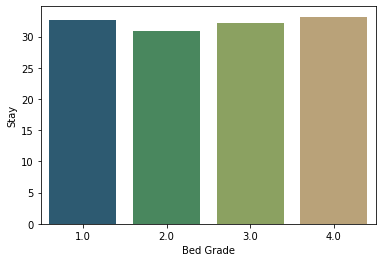

In [26]:
# Bed Grade 별로 재원일수가 유의한 차이가 있을까?
sns.barplot(x='Bed Grade', y='Stay', data=df.groupby(by=['Bed Grade']).mean()['Stay'].reset_index(), palette = 'gist_earth');

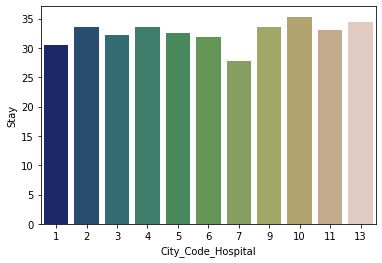

In [27]:
# 병원의 도시별로 재원일수가 유의한 차이가 있을까?
sns.barplot(x='City_Code_Hospital', y='Stay', data=df.groupby(by=['City_Code_Hospital']).mean()['Stay'].reset_index(), palette = 'gist_earth');

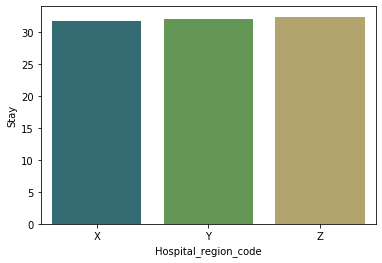

In [28]:
# 병원의 지역별로 재원일수가 유의한 차이가 있을까?
sns.barplot(x='Hospital_region_code', y='Stay', data=df.groupby(by=['Hospital_region_code']).mean()['Stay'].reset_index(), palette = 'gist_earth');

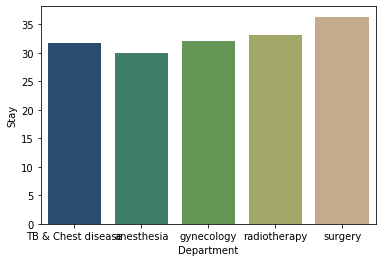

In [29]:
# 담당부서별로 재원일수가 유의한 차이가 있을까?
sns.barplot(x='Department', y='Stay', data=df.groupby(by=['Department']).mean()['Stay'].reset_index(), palette = 'gist_earth');

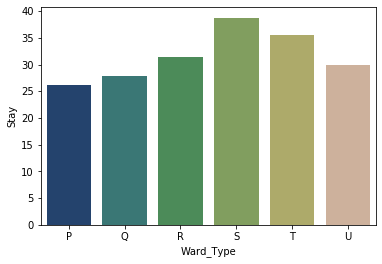

In [30]:
# 병동별로 재원일수가 유의한 차이가 있을까?
sns.barplot(x='Ward_Type', y='Stay', data=df.groupby(by=['Ward_Type']).mean()['Stay'].reset_index(), palette = 'gist_earth');

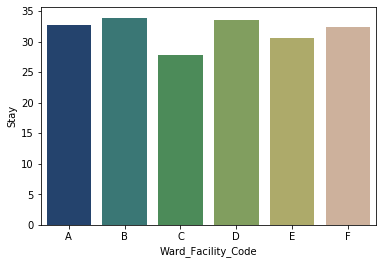

In [31]:
# 병동시설별 재원일수가 유의한 차이가 있을까?
sns.barplot(x='Ward_Facility_Code', y='Stay', data=df.groupby(by=['Ward_Facility_Code']).mean()['Stay'].reset_index(), palette = 'gist_earth');

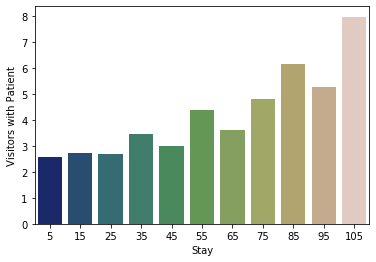

In [32]:
# Stay 와 방문객 간의 관계 -> 가설검정
sns.barplot(x='Stay', y='Visitors with Patient', data=df.groupby(by=['Stay']).mean()['Visitors with Patient'].reset_index(), palette = 'gist_earth');

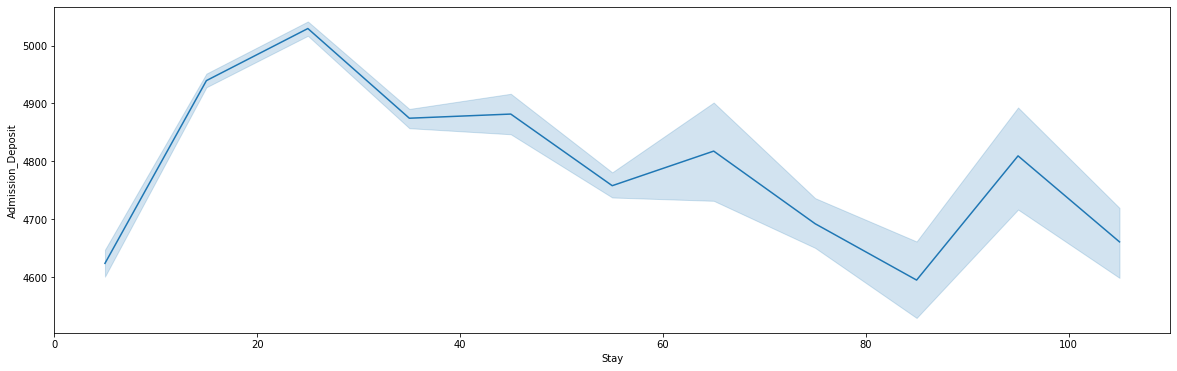

In [33]:
# 입원 보증금 별 재원일수가 유의한 차이가 있을까? -> 가설검정
plt.figure(figsize=(20, 6))
sns.lineplot(x='Stay', y='Admission_Deposit', data=df, palette = 'gist_earth');

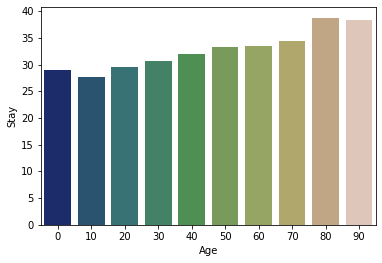

In [34]:
# 나이 별 재원일수가 유의한 차이가 있을까? -> 가설검정
sns.barplot(x='Age', y='Stay', data=df.groupby(by=['Age']).mean()['Stay'].reset_index(), palette = 'gist_earth');

### 1 - 4. 피처 간의 관계 시각화

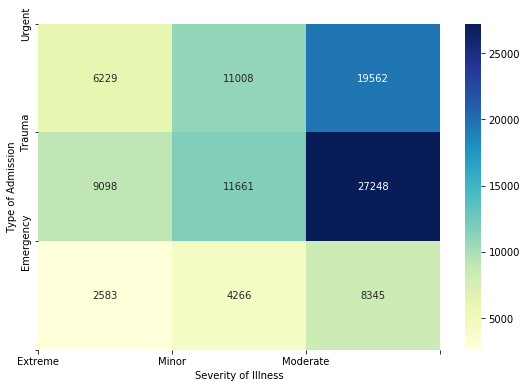

In [35]:
# 입원 유형과 질병 중등도 간의 관계 -> 가설검정
plt.figure(figsize=(9, 6))
obs = pd.crosstab(df['Type of Admission'], df['Severity of Illness'])
sns.heatmap(data=obs, annot=True, cmap = "YlGnBu", fmt='d')
plt.yticks((0, 1, 2, 3), labels=['Urgent', 'Trauma', 'Emergency'])
plt.xticks((0, 1, 2, 3), labels=['Extreme', 'Minor', 'Moderate'])
plt.show()

# 질병의 중증도와 입원 유형 사이에는 관계가 있어야 한다. 즉 중증도가 높을수록 응급실, 외상센터로 입원을 할 것이라 예상할 수 있다.
# 하지만 중간 중증도에서 응급실, 외상센터로 입원하는 경우가 가장 많았고, 그 다음으로는 경미한 중증도 환자가 외상 및 응급 상황으로 입원했다.
# 경미한 질병이 있는 어린이를 응급실로 데려가는 경우를 고려하더라도 외상센터로 입원하는 경우는 납득이 잘 되지 않는다.

### 1 - 5. Feature Engineering

In [36]:
# feature engeering

# 입원한 횟수
def ad_count(df) : 
  grouped = df.groupby('patientid').size()
  new_list = []
  for idx in range(df.shape[0]) : 
    result = grouped.loc[df['patientid'].iloc[idx]]
    new_list.append(result)
  df['ad_count']  = new_list

ad_count(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


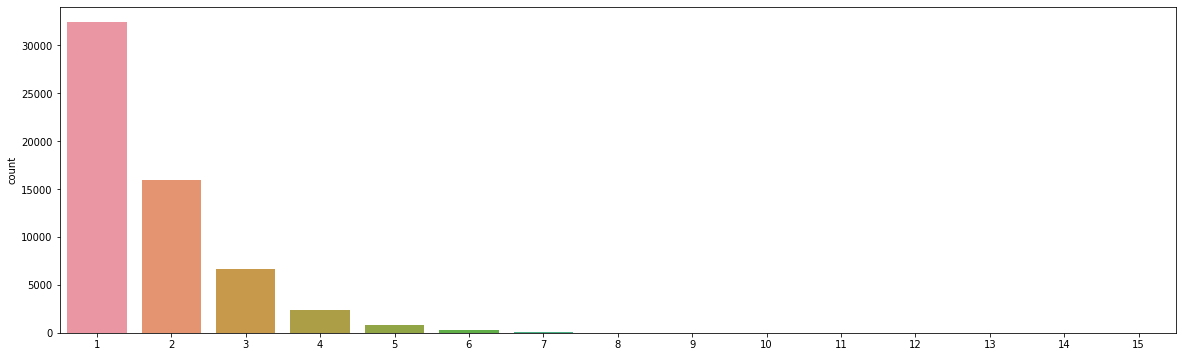

In [37]:
plt.figure(figsize=(20, 6))
grouped = df.groupby('patientid').size()
sns.countplot(grouped)

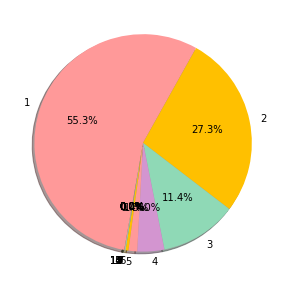

In [38]:
# 환자별 입원 횟수
plt.figure(figsize=(5, 5))
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(grouped.value_counts().values, labels=grouped.value_counts().index, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True, colors=colors)
plt.show()

In [39]:
# 범주형 데이터 인코딩
from category_encoders import OrdinalEncoder

enc = OrdinalEncoder(mapping=[{'col': 'Type of Admission', 'mapping': {'Urgent': 1, 'Emergency': 2, 'Trauma': 3}}, 
                      {'col': 'Severity of Illness', 'mapping': {'Minor': 1, 'Moderate': 2, 'Extreme': 3}},
                      {'col': 'Hospital_type_code', 'mapping': {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7}},
                      {'col': 'Hospital_region_code', 'mapping': {'X':1, 'Y':2, 'Z':3}},
                      {'col': 'Department', 'mapping': {'radiotherapy':1, 'anesthesia':2, 'gynecology':3, 'TB & Chest disease':4, 'surgery':5}},
                      {'col': 'Ward_Type', 'mapping': {'R':1, 'S':2, 'Q':3, 'P':4, 'T':5, 'U':6}},
                      {'col': 'Ward_Facility_Code', 'mapping': {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6}}])
df_encoded = enc.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


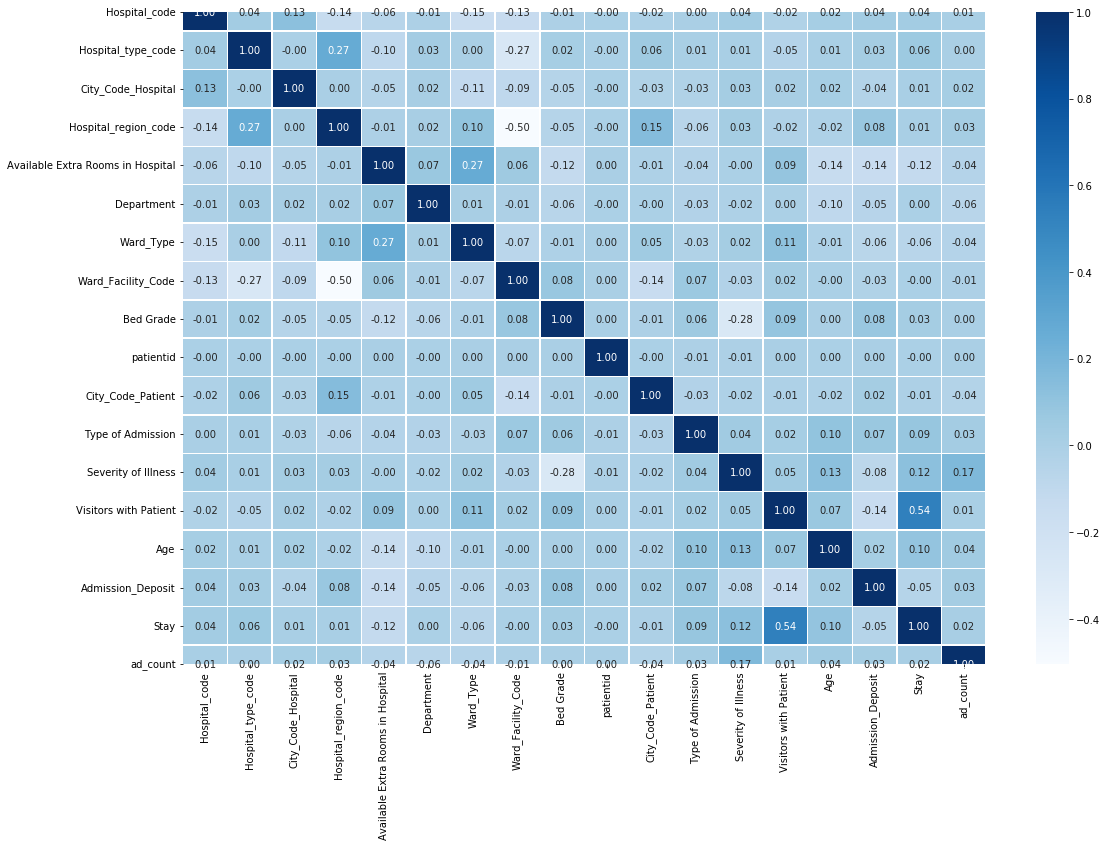

In [40]:
# 타겟(Stay)과 피처와의 상관관계

plt.figure(figsize=(18, 12))
sns.heatmap(df_encoded.corr(), fmt = '.2f', linewidths=.5, annot = True, cmap='Blues')
plt.show()

## 2. 회귀모델 

In [41]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_encoded, test_size=0.2, random_state=42)

train, val = train_test_split(train, test_size=0.2, random_state=42)

train.shape, val.shape, test.shape

((64000, 18), (16000, 18), (20000, 18))

In [42]:
target = 'Stay'

X_train = train.drop(target, axis=1)
y_train = train[target]

X_val = val.drop(target, axis=1)
y_val = val[target]

X_test = test.drop(target, axis=1)
y_test = test[target]

In [43]:
! pip3 install scipy

In [44]:
# 데이터 누수 확인
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=2)

model.fit(X_train, y_train)
print('훈련 정확도: ', model.score(X_train, y_train))
print('검증 정확도: ', model.score(X_val, y_val))
# 방문객 수 때문에 데이터 누수가 있을 거라고 예상했지만 데이터 누수 없음

훈련 정확도:  0.39221875
검증 정확도:  0.3800625


## 2. 모델링

### 2 - 1. 다중 선형 회귀 모델

2-1-1. 기준모델

In [45]:
df = pd.read_csv('/content/drive/MyDrive/data/train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/data/test_data.csv')
df_dict = pd.read_csv('/content/drive/MyDrive/data/train_data_dictionary.csv')
test_label = pd.read_csv('/content/drive/MyDrive/data/sample_sub.csv')
test = test.merge(test_label, on='case_id')
df_org = pd.concat([df, test], axis=0).reset_index(drop=True)

df.shape

(318438, 18)

In [46]:
# 전체 샘플수의 1.5 % 에 해당하므로 결측값 제거
df.dropna(axis=0, inplace=True)

In [47]:
# feature engineering

# 환자별 입원한 횟수
def ad_count(df) : 
  grouped = df.groupby('patientid').size()
  new_list = []
  for idx in range(df.shape[0]) : 
    result = grouped.loc[df['patientid'].iloc[idx]]
    new_list.append(result)
  df['ad_count']  = new_list

ad_count(df)

# Admission Deposit 구간 나누기
def ad_dep(x):
    if x <= 2000: return 1
    elif x <= 4000 : return 3
    elif x <= 6000 : return 5
    elif x <= 8000 : return 7
    elif x <= 10000 : return 9
    return 11                        
    
df['Admission_Deposit'] = df['Admission_Deposit'].apply(lambda x: ad_dep(x))

In [48]:
# case_id, patientid 제거
df.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [49]:
df = df.sample(n=100000, random_state=42).reset_index(drop=True)

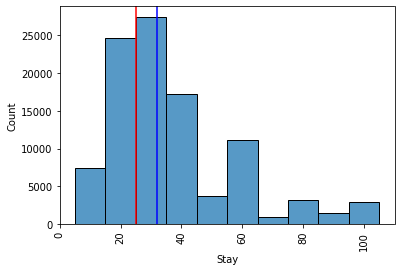

In [50]:
# 타겟의 분포 확인
age_enc(df)
stay_enc(df)
sns.histplot(df['Stay'].sort_values(), binwidth=10)
plt.axvline(df['Stay'].mean(), color='blue')
plt.axvline(df['Stay'].median(), color='red');
plt.xticks(rotation=90)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df.drop('Visitors with Patient', axis=1), test_size=0.2, random_state=42)

train, val = train_test_split(train, test_size=0.2, random_state=42)

train.shape, val.shape, test.shape

((64000, 16), (16000, 16), (20000, 16))

In [52]:
target = 'Stay'

X_train = train.drop(target, axis=1)
y_train = train[target]

X_val = val.drop(target, axis=1)
y_val = val[target]

X_test = test.drop(target, axis=1)
y_test = test[target]

In [53]:
# 평균으로 기준모델 만들기
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

test_pred = [train['Stay'].mean()] * len(test)

print("test rmse: ", np.sqrt(mean_squared_error(y_test, test_pred)))
print("test r2 score: ", r2_score(y_test, test_pred))

test rmse:  21.496456750183274
test r2 score:  -8.251705978290502e-06


2-1-2. 모델링

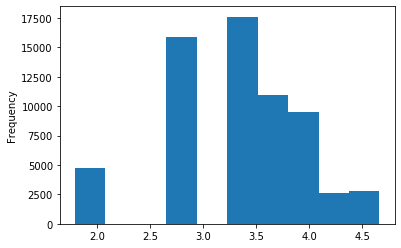

In [54]:
# 클래스 불균형 로그변환
train['transformed']=np.log1p(train['Stay'])
val['transformed']=np.log1p(val['Stay'])
test['transformed']=np.log1p(test['Stay'])
train['transformed'].plot(kind='hist')
plt.show()

In [55]:
target = ['Stay', 'transformed']

X_train = train.drop(target, axis=1)
y_train = train['transformed']

X_val = val.drop(target, axis=1)
y_val = val['transformed']

X_test = test.drop(target, axis=1)
y_test = test['transformed']

In [56]:
# 순서형 데이터 인코딩
from category_encoders import OrdinalEncoder

enc = OrdinalEncoder(mapping=[{'col': 'Type of Admission', 'mapping': {'Urgent': 1, 'Emergency': 2, 'Trauma': 3}}, 
                      {'col': 'Severity of Illness', 'mapping': {'Minor': 1, 'Moderate': 2, 'Extreme': 3}}])
X_train_encoded = enc.fit_transform(X_train)
X_val_encoded = enc.transform(X_val)
X_test_encoded = enc.transform(X_test)

# 원 핫 인코딩
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(use_cat_names = True)
X_train_encoded = encoder.fit_transform(X_train_encoded)
X_val_encoded = encoder.transform(X_val_encoded)
X_test_encoded = encoder.transform(X_test_encoded)

In [57]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear = LinearRegression()

linear.fit(X_train_scaled, y_train)

train_pred = linear.predict(X_train_scaled)
val_pred = linear.predict(X_val_scaled)

print("training mae: ", mean_absolute_error(y_train, train_pred))
print("validation mae: ", mean_absolute_error(y_val, val_pred))
print("training r2 score: ", r2_score(y_train, train_pred))
print("validation r2 score: ", r2_score(y_val, val_pred))

training mae:  0.48820983415195324
validation mae:  611122215.0624666
training r2 score:  0.07043215391373647
validation r2 score:  -6.830491160345315e+21


In [59]:
test_pred = linear.predict(X_test_scaled)
print("선형 회귀 test mae: ", mean_absolute_error(y_test, test_pred))
print("선형 회귀 test r2 score: ", r2_score(y_test, test_pred))

선형 회귀 test mae:  0.4889869103651225
선형 회귀 test r2 score:  0.06635698703691262


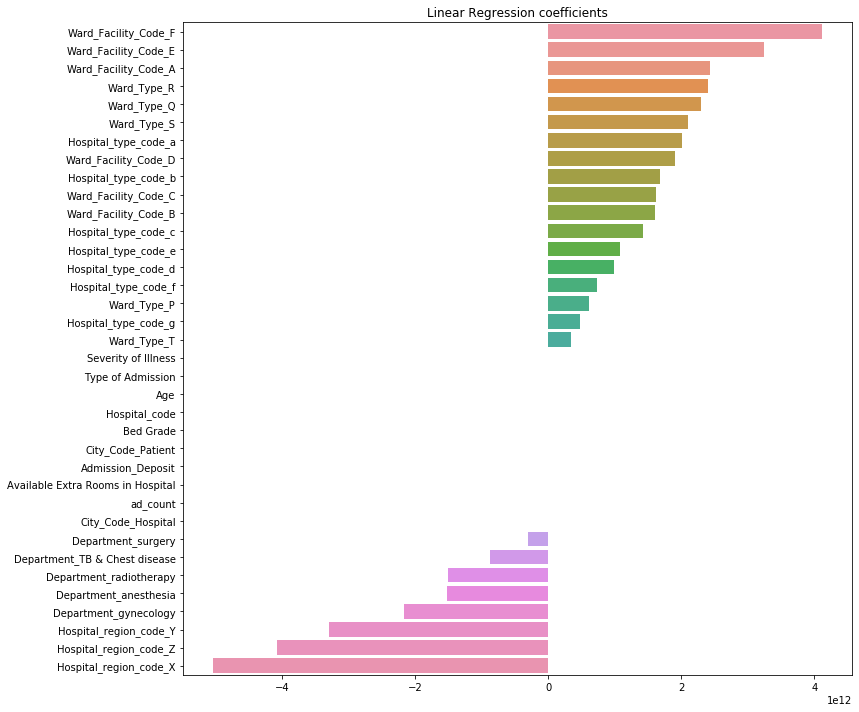

In [60]:
plt.figure(figsize=(12,12))
coefficients = pd.Series(linear.coef_, X_test_encoded.columns)
coeff = coefficients.sort_values(ascending=False)
plt.title('Linear Regression coefficients')
sns.barplot(x=coeff , y=coeff.index)

### 2 - 2. 릿지 모델

In [61]:
from sklearn.linear_model import LinearRegression, Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train_scaled, y_train)

Ridge()

In [62]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train_scaled, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
best_rige = get_best_params(ridge_reg, ridge_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.6312, 최적 alpha:{'alpha': 20}


In [63]:
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=20)

In [64]:
test_pred = ridge_reg.predict(X_test_scaled)
print("릿지 회귀 test mae: ", mean_absolute_error(y_test, test_pred))
print("릿지 회귀 test r2 score: ", r2_score(y_test, test_pred))

릿지 회귀 test mae:  0.4857789436124835
릿지 회귀 test r2 score:  0.07752887085123983


### 2 - 3. 트리 기반 회귀 모델

In [65]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

train, val = train_test_split(train, test_size=0.2, random_state=42)

train.shape, val.shape, test.shape

((64000, 17), (16000, 17), (20000, 17))

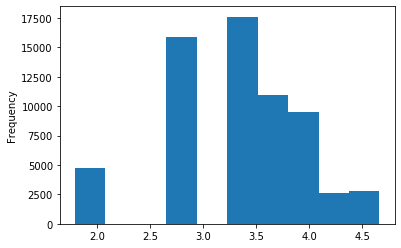

In [66]:
# 클래스 불균형 로그변환
train['transformed']=np.log1p(train['Stay'])
val['transformed']=np.log1p(val['Stay'])
test['transformed']=np.log1p(test['Stay'])
train['transformed'].plot(kind='hist')
plt.show()

In [67]:
target = ['Stay', 'transformed']

X_train = train.drop(target, axis=1)
y_train = train['transformed']

X_val = val.drop(target, axis=1)
y_val = val['transformed']

X_test = test.drop(target, axis=1)
y_test = test['transformed']

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

enc = OrdinalEncoder(mapping=[{'col': 'Type of Admission', 'mapping': {'Urgent': 1, 'Emergency': 2, 'Trauma': 3}}, 
                      {'col': 'Severity of Illness', 'mapping': {'Minor': 1, 'Moderate': 2, 'Extreme': 3}},
                      {'col': 'Hospital_type_code', 'mapping': {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7}},
                      {'col': 'Hospital_region_code', 'mapping': {'X':1, 'Y':2, 'Z':3}},
                      {'col': 'Department', 'mapping': {'radiotherapy':1, 'anesthesia':2, 'gynecology':3, 'TB & Chest disease':4, 'surgery':5}},
                      {'col': 'Ward_Type', 'mapping': {'R':1, 'S':2, 'Q':3, 'P':4, 'T':5, 'U':6}},
                      {'col': 'Ward_Facility_Code', 'mapping': {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6}}])

X_train_encoded = enc.fit_transform(X_train.drop('Visitors with Patient', axis=1))
X_val_encoded = enc.transform(X_val.drop('Visitors with Patient', axis=1))
X_test_encoded = enc.transform(X_test.drop('Visitors with Patient', axis=1))

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_train_encoded, y_train)

RandomForestRegressor(n_estimators=1000)

In [70]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
xgb_reg.fit(X_train_encoded, y_train)

[02:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.5, learning_rate=0.05, n_estimators=1000,
             subsample=0.8)

In [71]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
lgbm_reg.fit(X_train_encoded, y_train)

LGBMRegressor(colsample_bytree=0.4, learning_rate=0.05, n_estimators=1000,
              num_leaves=4, reg_lambda=10, subsample=0.6)

In [72]:
test_pred = rf_reg.predict(X_test_encoded)
print("랜덤포레스트 회귀 test mae: ", mean_absolute_error(y_test, test_pred))
print("랜덤포레스트 회귀 test r2 score: ", r2_score(y_test, test_pred))

랜덤포레스트 회귀 test mae:  0.49151114275843466
랜덤포레스트 회귀 test r2 score:  0.05901707848486859


In [73]:
test_pred = xgb_reg.predict(X_test_encoded)
print("xgb 회귀 test mae: ", mean_absolute_error(y_test, test_pred))
print("xgb 회귀 test r2 score: ", r2_score(y_test, test_pred))

xgb 회귀 test mae:  0.47006794922725903
xgb 회귀 test r2 score:  0.13197312317421794


In [74]:
test_pred = lgbm_reg.predict(X_test_encoded)
print("lgbm 회귀 test mae: ", mean_absolute_error(y_test, test_pred))
print("lgbm 회귀 test r2 score: ", r2_score(y_test, test_pred))

lgbm 회귀 test mae:  0.4731134678366995
lgbm 회귀 test r2 score:  0.12272239157109721


### 2 - 4. 트리 모델

In [75]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

train, val = train_test_split(train, test_size=0.2, random_state=42)

train.shape, val.shape, test.shape

((64000, 17), (16000, 17), (20000, 17))

In [76]:
def value_change(x):
  if x <= 5 : return 0       # 0-10
  elif x <= 15 : return 1    # 11-20
  elif x <= 25 : return 2    # 21-30
  elif x <= 45 : return 3    # 31-50
  return 4                   # 51-

train['Stay'] = train['Stay'].apply(lambda x: value_change(x))
val['Stay'] = val['Stay'].apply(lambda x: value_change(x))
test['Stay'] = test['Stay'].apply(lambda x: value_change(x))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


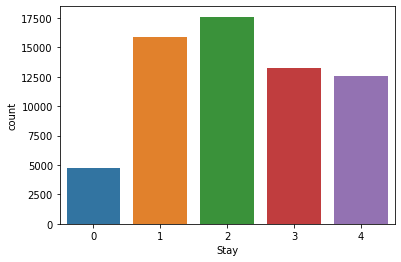

In [77]:
# 타겟 범위 설정
sns.countplot(train['Stay'].sort_values())
plt.show()

2-4-1. 기준모델

In [78]:
target = 'Stay'

X_train = train.drop(target, axis=1)
y_train = train['Stay']

X_val = val.drop(target, axis=1)
y_val = val['Stay']

X_test = test.drop(target, axis=1)
y_test = test['Stay']

In [79]:
# 최빈값으로 기준모델 만들기
from sklearn.metrics import accuracy_score, f1_score

test_pred = [train['Stay'].mode()[0]] * len(test)

print("test accuracy: ", accuracy_score(y_test, test_pred))
print("test f1_score: ", f1_score(y_test, test_pred, average='weighted'))

test accuracy:  0.27245
test f1_score:  0.11667099296632483


In [80]:
!pip3 install imblearn

2-4-2. 모델링

In [81]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

enc = OrdinalEncoder(mapping=[{'col': 'Type of Admission', 'mapping': {'Urgent': 1, 'Emergency': 2, 'Trauma': 3}}, 
                      {'col': 'Severity of Illness', 'mapping': {'Minor': 1, 'Moderate': 2, 'Extreme': 3}},
                      {'col': 'Hospital_type_code', 'mapping': {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7}},
                      {'col': 'Hospital_region_code', 'mapping': {'X':1, 'Y':2, 'Z':3}},
                      {'col': 'Department', 'mapping': {'radiotherapy':1, 'anesthesia':2, 'gynecology':3, 'TB & Chest disease':4, 'surgery':5}},
                      {'col': 'Ward_Type', 'mapping': {'R':1, 'S':2, 'Q':3, 'P':4, 'T':5, 'U':6}},
                      {'col': 'Ward_Facility_Code', 'mapping': {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6}}])

X_train_encoded = enc.fit_transform(X_train.drop('Visitors with Patient', axis=1))
X_val_encoded = enc.transform(X_val.drop('Visitors with Patient', axis=1))
X_test_encoded = enc.transform(X_test.drop('Visitors with Patient', axis=1))

# imbalanced-learn 패키지
from imblearn.over_sampling import SMOTE

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
oversample = SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train_encoded, y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


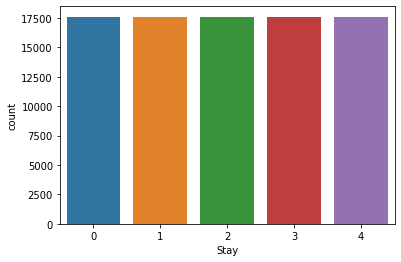

In [82]:
sns.countplot(y_train_over)
plt.show()

In [83]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_over, y_train_over)

train_pred = dtree.predict(X_train_over)
val_pred = dtree.predict(X_val_encoded)
test_pred = dtree.predict(X_test_encoded)

print("training accuracy: ", dtree.score(X_train_over, y_train_over))
print("validation accuracy: ", dtree.score(X_val_encoded, y_val))
print("training f1_score: ", f1_score(y_train_over, train_pred, average='weighted'))
print("validation f1_score: ", f1_score(y_val, val_pred, average='weighted'))

print("test f1_score: ", dtree.score(X_test_encoded, y_test))
print("test f1_score: ", f1_score(y_test, test_pred, average='weighted'))

training accuracy:  0.9819679581865697
validation accuracy:  0.272375
training f1_score:  0.9819710914833859
validation f1_score:  0.2738780679681241
test f1_score:  0.28005
test f1_score:  0.2816984927156988


In [84]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [28, 32, 34],
    'min_samples_split' : [2, 3, 4],
    'max_features' : [0.2, 0.3, 0.4]
}

grid_cv = GridSearchCV(dtree, param_grid=params, scoring='f1_weighted', cv=5, verbose=1)
grid_cv.fit(X_train_over , y_train_over)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV 최고 평균 정확도 수치:0.3850
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 32, 'max_features': 0.2, 'min_samples_split': 2}


In [85]:
best_dtree = grid_cv.best_estimator_

pred = dtree.predict(X_test_encoded)

accuracy = accuracy_score(y_test , pred)
f1score = f1_score(y_test , pred, average='weighted')

print('결정 트리 예측 정확도 :{0:.4f}'.format(accuracy))
print('결정 트리 f1 score :{0:.4f}'.format(f1score))

결정 트리 예측 정확도 :0.2801
결정 트리 f1 score :0.2817


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

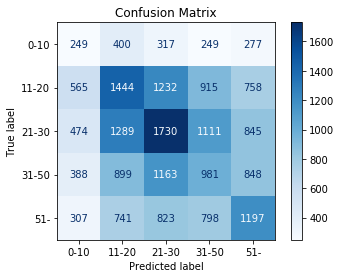

In [86]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['0-10', '11-20', '21-30', '31-50', '51-'] # 라벨 설정
plot = plot_confusion_matrix(dtree, # 분류 모델
                             X_test_encoded, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [87]:
# classification report
from sklearn.metrics import classification_report

cm_lgbm =  classification_report(y_test, pred)
print(cm_lgbm);

              precision    recall  f1-score   support

           0       0.13      0.17      0.14      1492
           1       0.30      0.29      0.30      4914
           2       0.33      0.32      0.32      5449
           3       0.24      0.23      0.24      4279
           4       0.30      0.31      0.31      3866

    accuracy                           0.28     20000
   macro avg       0.26      0.26      0.26     20000
weighted avg       0.28      0.28      0.28     20000



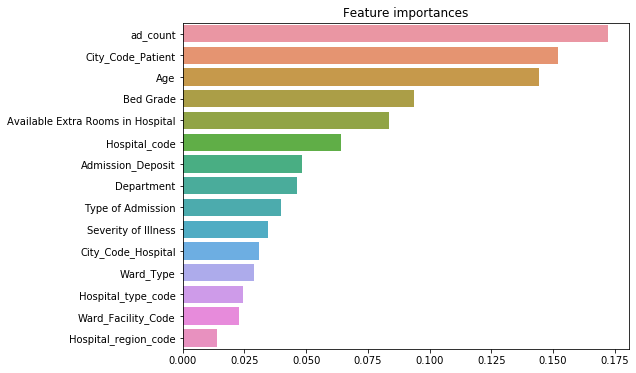

In [88]:
ftr_importances_values = best_dtree.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train_encoded.columns)

# 중요도값 순으로 Series를 정렬
ftr = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr , y = ftr.index)
plt.show()

### 2 - 4. 랜덤 포레스트 모델

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train_over, y_train_over)

train_pred = rf.predict(X_train_over)
val_pred = rf.predict(X_val_encoded)

print("training accuracy: ", rf.score(X_train_over, y_train_over))
print("validation accuracy: ", rf.score(X_val_encoded, y_val))
print("training f1_score: ", f1_score(y_train_over, train_pred, average='weighted'))
print("validation f1_score: ", f1_score(y_val, val_pred, average='weighted'))

training accuracy:  0.9819679581865697
validation accuracy:  0.3235625
training f1_score:  0.9819625041796385
validation f1_score:  0.3208071205616928


In [90]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 200],
    'max_depth' : [15, 20], 
    'min_samples_leaf' : [18, 20],
    'min_samples_split' : [6, 7, 8]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params , cv=2, n_jobs=-1)
grid_cv.fit(X_train_over, y_train_over)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 6, 'n_estimators': 200}
최고 예측 정확도: 0.4075


In [91]:
best_rf = grid_cv.best_estimator_

pred = best_rf.predict(X_test_encoded)

accuracy = accuracy_score(y_test , pred)
f1score = f1_score(y_test , pred, average='weighted')

print('결정 트리 예측 정확도 :{0:.4f}'.format(accuracy))
print('결정 트리 f1 score :{0:.4f}'.format(f1score))

결정 트리 예측 정확도 :0.3493
결정 트리 f1 score :0.3351


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

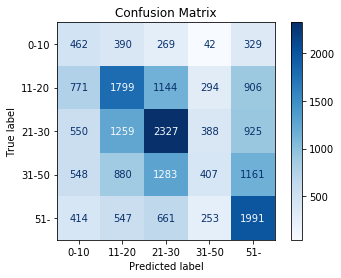

In [92]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['0-10', '11-20', '21-30', '31-50', '51-'] # 라벨 설정
plot = plot_confusion_matrix(best_rf, # 분류 모델
                             X_test_encoded, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [93]:
# classification report
from sklearn.metrics import classification_report

cm_lgbm = classification_report(y_test, pred)
print(cm_lgbm);

              precision    recall  f1-score   support

           0       0.17      0.31      0.22      1492
           1       0.37      0.37      0.37      4914
           2       0.41      0.43      0.42      5449
           3       0.29      0.10      0.14      4279
           4       0.37      0.52      0.43      3866

    accuracy                           0.35     20000
   macro avg       0.32      0.34      0.32     20000
weighted avg       0.35      0.35      0.34     20000



In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

pred_probs = best_rf.predict_proba(X_val_encoded)
roc_auc = roc_auc_score(y_val, pred_probs, multi_class='ovo')
roc_auc

0.6643451843793982

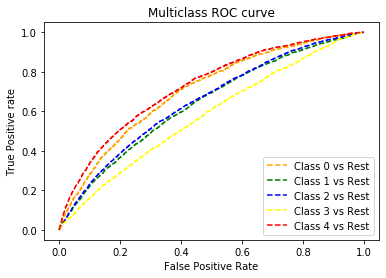

In [95]:
from sklearn.metrics import roc_curve

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val, pred_probs[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

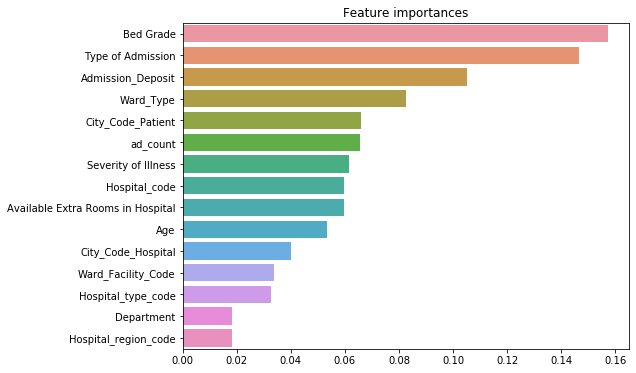

In [96]:
ftr_importances_values = best_rf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train_encoded.columns  )

# 중요도값 순으로 Series를 정렬
ftr = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr , y = ftr.index)
plt.show()

### 2 - 5. Gradient Boosting 모델

In [97]:
from xgboost import XGBClassifier

# GridSearchCV 결과 최적의 하이퍼 파라미터'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 1}

xgb = XGBClassifier(n_estimators=1000
                  , random_state=42
                  , n_jobs=-1
                  , max_depth=7
                  , min_child_weight=1
                  , colsample_bytree=0.75
                  , learning_rate=0.1
                 )

eval_set = [(X_train_over, y_train_over), (X_val_encoded, y_val)]

xgb.fit(X_train_over, y_train_over, 
          eval_set=eval_set,
          eval_metric='merror',
          early_stopping_rounds=50
         )

[0]	validation_0-merror:0.62352	validation_1-merror:0.702812
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.595251	validation_1-merror:0.663813
[2]	validation_0-merror:0.584525	validation_1-merror:0.654125
[3]	validation_0-merror:0.581411	validation_1-merror:0.650563
[4]	validation_0-merror:0.581059	validation_1-merror:0.6505
[5]	validation_0-merror:0.578355	validation_1-merror:0.649688
[6]	validation_0-merror:0.577548	validation_1-merror:0.650937
[7]	validation_0-merror:0.575435	validation_1-merror:0.647375
[8]	validation_0-merror:0.575651	validation_1-merror:0.649938
[9]	validation_0-merror:0.571651	validation_1-merror:0.648063
[10]	validation_0-merror:0.569901	validation_1-merror:0.647687
[11]	validation_0-merror:0.568004	validation_1-merror:0.646125
[12]	validation_0-merror:0.56622	validation_1-merror:0.6455
[13]	validation_0-merror:0.565118	

XGBClassifier(colsample_bytree=0.75, max_depth=7, n_estimators=1000, n_jobs=-1,
              objective='multi:softprob', random_state=42)

In [98]:
# classification report
from sklearn.metrics import classification_report

preds = xgb.predict(X_test_encoded)
cm_xgb = classification_report(y_test, preds)
print(cm_xgb);

              precision    recall  f1-score   support

           0       0.22      0.18      0.19      1492
           1       0.38      0.42      0.40      4914
           2       0.41      0.49      0.44      5449
           3       0.27      0.11      0.16      4279
           4       0.39      0.50      0.44      3866

    accuracy                           0.37     20000
   macro avg       0.33      0.34      0.33     20000
weighted avg       0.35      0.37      0.35     20000



In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

pred_probs = xgb.predict_proba(X_test_encoded)
roc_auc = roc_auc_score(y_test, pred_probs, multi_class='ovo')
roc_auc

0.6797229530028902

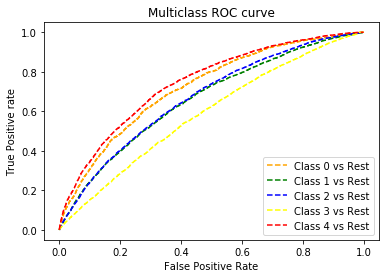

In [100]:
from sklearn.metrics import roc_curve

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_probs[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

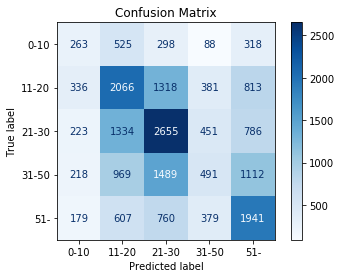

In [101]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['0-10', '11-20', '21-30', '31-50', '51-'] # 라벨 설정
plot = plot_confusion_matrix(xgb, # 분류 모델
                             X_test_encoded, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

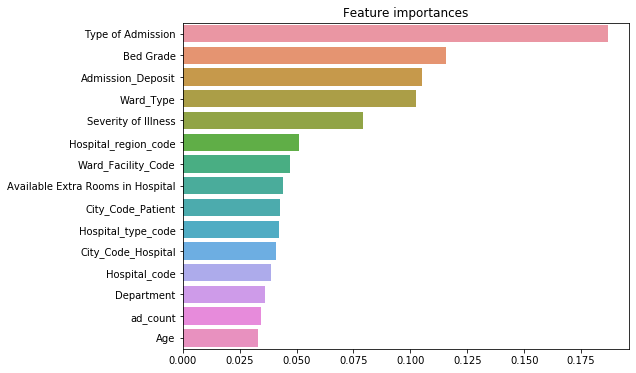

In [102]:
ftr_importances_values = xgb.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train_encoded.columns  )

# 중요도값 순으로 Series를 정렬
ftr = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr , y = ftr.index)
plt.show()

### 2 - 6. Light GBM 모델

In [103]:
from lightgbm import LGBMClassifier

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=1000, multi_class='multiclass')

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
eval_set = [(X_train_over, y_train_over), (X_val_encoded, y_val)]
lgbm_wrapper.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric="error", 
                 eval_set=eval_set, verbose=True)

[1]	training's multi_logloss: 1.58594	training's multi_error: 0.607386	valid_1's multi_logloss: 1.59499	valid_1's multi_error: 0.662
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 1.5659	training's multi_error: 0.605704	valid_1's multi_logloss: 1.58245	valid_1's multi_error: 0.658937
[3]	training's multi_logloss: 1.54846	training's multi_error: 0.602159	valid_1's multi_logloss: 1.57123	valid_1's multi_error: 0.658625
[4]	training's multi_logloss: 1.53317	training's multi_error: 0.60242	valid_1's multi_logloss: 1.56153	valid_1's multi_error: 0.658875
[5]	training's multi_logloss: 1.51977	training's multi_error: 0.599171	valid_1's multi_logloss: 1.55304	valid_1's multi_error: 0.658563
[6]	training's multi_logloss: 1.50759	training's multi_error: 0.598477	valid_1's multi_logloss: 1.54541	valid_1's multi_error: 0.658375
[7]	training's multi_logloss: 1.49664	training's multi_error: 0.594546	valid_1's multi_logloss: 1.53847	valid_1's multi_error:

LGBMClassifier(multi_class='multiclass', n_estimators=1000)

In [104]:
# GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 64, 'subsample': 0.8}
best_lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, sumbsample=0.8, min_child_samples=60,
                          max_depth=128)
evals = [(X_train_over, y_train_over), (X_val_encoded, y_val)]
best_lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric="error", eval_set=evals,
                verbose=True)

preds = best_lgbm.predict(X_test_encoded)

[1]	training's multi_logloss: 1.58285	training's multi_error: 0.59558	valid_1's multi_logloss: 1.59337	valid_1's multi_error: 0.652937
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 1.56016	training's multi_error: 0.593512	valid_1's multi_logloss: 1.57953	valid_1's multi_error: 0.65225
[3]	training's multi_logloss: 1.54041	training's multi_error: 0.591376	valid_1's multi_logloss: 1.56729	valid_1's multi_error: 0.65425
[4]	training's multi_logloss: 1.52312	training's multi_error: 0.58924	valid_1's multi_logloss: 1.55658	valid_1's multi_error: 0.651188
[5]	training's multi_logloss: 1.50811	training's multi_error: 0.586149	valid_1's multi_logloss: 1.54734	valid_1's multi_error: 0.651
[6]	training's multi_logloss: 1.4948	training's multi_error: 0.584036	valid_1's multi_logloss: 1.53926	valid_1's multi_error: 0.651312
[7]	training's multi_logloss: 1.48235	training's multi_error: 0.582502	valid_1's multi_logloss: 1.53176	valid_1's multi_error: 0.

In [105]:
# classification report
from sklearn.metrics import classification_report

cm_lgbm = classification_report(y_test, preds)
print(cm_lgbm);

              precision    recall  f1-score   support

           0       0.21      0.17      0.19      1492
           1       0.38      0.41      0.40      4914
           2       0.40      0.49      0.44      5449
           3       0.28      0.11      0.16      4279
           4       0.38      0.50      0.44      3866

    accuracy                           0.37     20000
   macro avg       0.33      0.34      0.32     20000
weighted avg       0.35      0.37      0.35     20000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

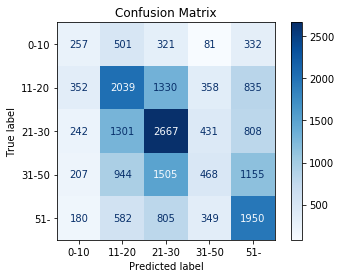

In [106]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['0-10', '11-20', '21-30', '31-50', '51-'] # 라벨 설정
plot = plot_confusion_matrix(best_lgbm, # 분류 모델
                             X_test_encoded, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

pred_probs = best_lgbm.predict_proba(X_test_encoded)
roc_auc = roc_auc_score(y_test, pred_probs, multi_class='ovo')
roc_auc

0.6787600124339159

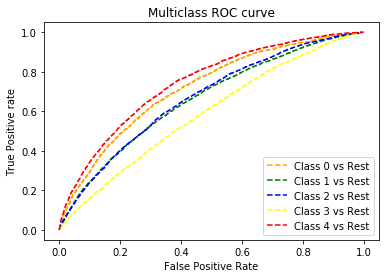

In [108]:
from sklearn.metrics import roc_curve

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_probs[:,i], pos_label=i)
    roc_i = pd.DataFrame({
    'FPR(Fall-out)': fpr[i], 
    'TPRate(Recall)': tpr[i], 
    'Threshold': thresh[i]
})
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [109]:
# threshold 최대값의 인덱스, np.argmax()

# for i in range(n_class):
#   optimal_idx = np.argmax(tpr[i] - fpr[i])    
#   optimal_threshold = thresh[i][optimal_idx]
#   print('idx:', optimal_idx, ', threshold:', optimal_threshold)

In [110]:
# y_pred_proba = lgbm_wrapper.predict_proba(X_val_encoded)

In [111]:
# pred_proba = pd.DataFrame(y_pred_proba)
# pred_proba

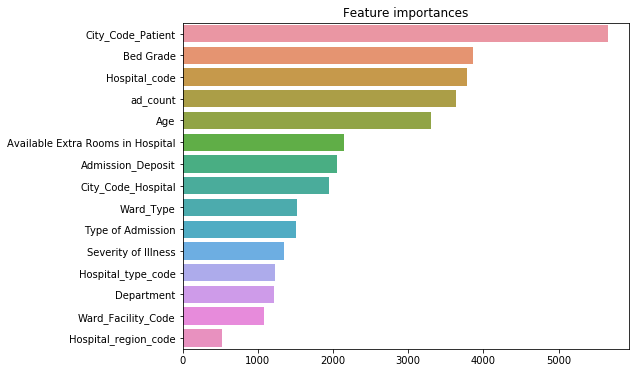

In [112]:
ftr_importances_values = lgbm_wrapper.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train_encoded.columns  )

# 중요도값 순으로 Series를 정렬
ftr = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr , y = ftr.index)
plt.show()

## 3. 모델 해석

3 - 1. permutation importances

In [113]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    xgb, # model
    scoring='f1_weighted', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)


# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_encoded, y_val);

In [114]:
feature_names = X_val_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

Ward_Type                            0.038992
Bed Grade                            0.029218
Admission_Deposit                    0.024188
Severity of Illness                  0.019872
Ward_Facility_Code                   0.017144
Type of Admission                    0.016417
City_Code_Patient                    0.015665
ad_count                             0.014777
City_Code_Hospital                   0.014343
Hospital_code                        0.013646
Available Extra Rooms in Hospital    0.011583
Hospital_region_code                 0.011227
Age                                  0.006592
Department                           0.005919
Hospital_type_code                   0.005577
dtype: float64

In [115]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0390 ± 0.0048,Ward_Type
0.0292 ± 0.0048,Bed Grade
0.0242 ± 0.0016,Admission_Deposit
0.0199 ± 0.0022,Severity of Illness
0.0171 ± 0.0011,Ward_Facility_Code
0.0164 ± 0.0040,Type of Admission
0.0157 ± 0.0023,City_Code_Patient
0.0148 ± 0.0047,ad_count
0.0143 ± 0.0010,City_Code_Hospital
0.0136 ± 0.0046,Hospital_code


In [116]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    best_rf, # model
    scoring='f1_weighted', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)


# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_encoded, y_val);

In [117]:
feature_names = X_val_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

Ward_Type                            0.034309
Bed Grade                            0.031386
Admission_Deposit                    0.022826
Type of Admission                    0.017785
Severity of Illness                  0.014219
Ward_Facility_Code                   0.010330
Hospital_type_code                   0.007121
Available Extra Rooms in Hospital    0.006776
ad_count                             0.006175
Hospital_region_code                 0.006143
Hospital_code                        0.005786
City_Code_Hospital                   0.004214
City_Code_Patient                    0.003883
Department                           0.003268
Age                                 -0.002294
dtype: float64

In [118]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0343 ± 0.0041,Ward_Type
0.0314 ± 0.0045,Bed Grade
0.0228 ± 0.0022,Admission_Deposit
0.0178 ± 0.0023,Type of Admission
0.0142 ± 0.0025,Severity of Illness
0.0103 ± 0.0027,Ward_Facility_Code
0.0071 ± 0.0013,Hospital_type_code
0.0068 ± 0.0025,Available Extra Rooms in Hospital
0.0062 ± 0.0027,ad_count
0.0061 ± 0.0020,Hospital_region_code


In [119]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    best_lgbm, # model
    scoring='f1_weighted', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)


# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_encoded, y_val);

In [120]:
feature_names = X_val_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

Ward_Type                            0.036550
Bed Grade                            0.027973
Admission_Deposit                    0.025171
Severity of Illness                  0.016312
Ward_Facility_Code                   0.015144
Hospital_region_code                 0.014076
City_Code_Patient                    0.014041
Type of Admission                    0.013885
City_Code_Hospital                   0.013410
ad_count                             0.012714
Hospital_code                        0.010310
Available Extra Rooms in Hospital    0.006764
Department                           0.006546
Hospital_type_code                   0.006425
Age                                  0.003458
dtype: float64

In [121]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0366 ± 0.0053,Ward_Type
0.0280 ± 0.0046,Bed Grade
0.0252 ± 0.0016,Admission_Deposit
0.0163 ± 0.0026,Severity of Illness
0.0151 ± 0.0018,Ward_Facility_Code
0.0141 ± 0.0018,Hospital_region_code
0.0140 ± 0.0027,City_Code_Patient
0.0139 ± 0.0032,Type of Admission
0.0134 ± 0.0024,City_Code_Hospital
0.0127 ± 0.0040,ad_count


3 - 2. PDP

In [122]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Ward_Type', 'Ward_Facility_Code']

interaction = pdp_interact(
    model=xgb, 
    dataset=X_test_encoded,
    model_features=X_test_encoded.columns, 
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


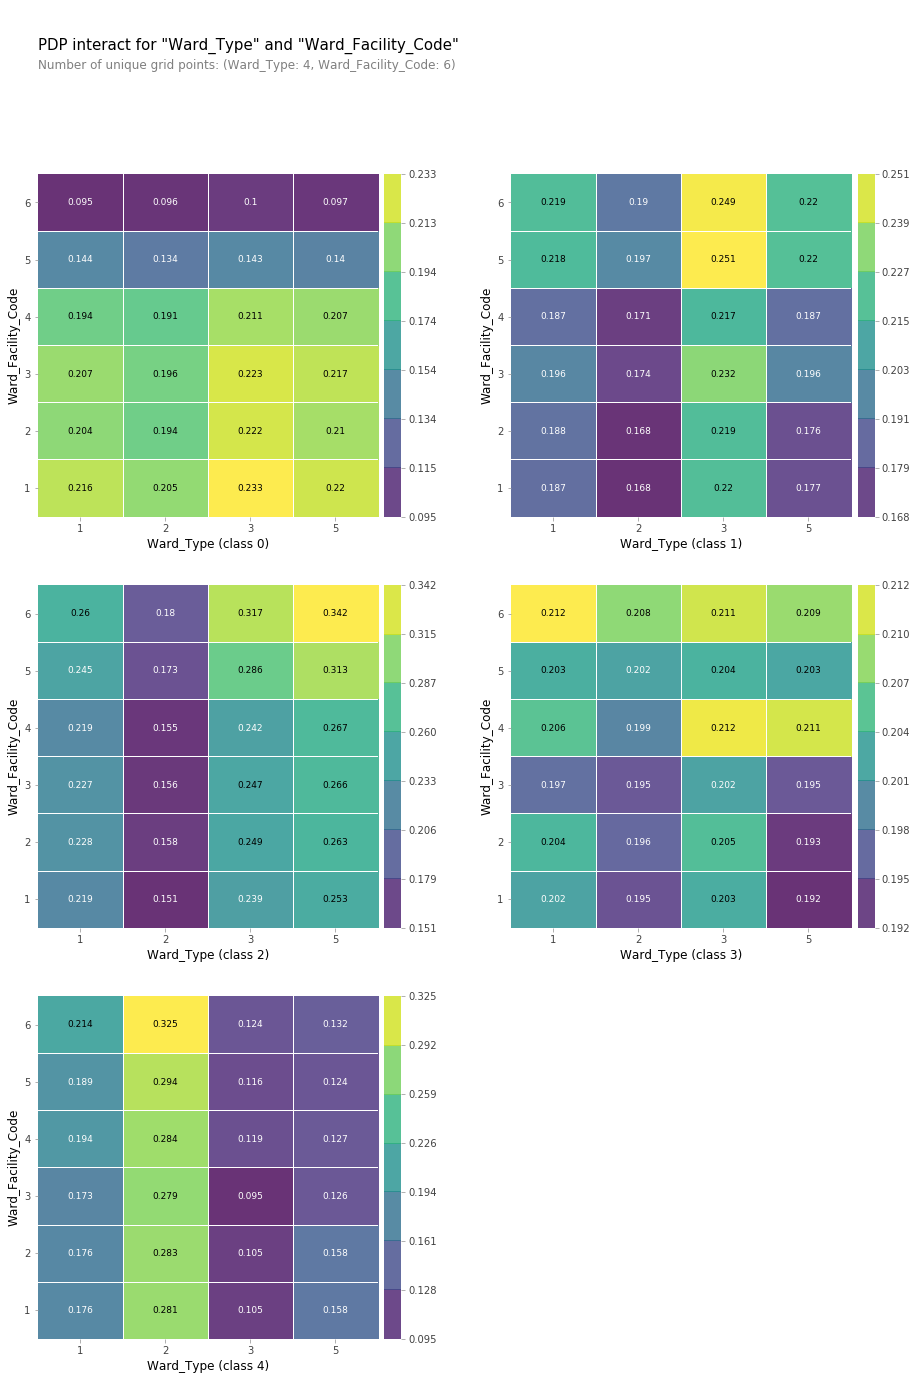

In [123]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [142]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Ward_Type', 'Ward_Facility_Code']

interaction = pdp_interact(
    model=xgb_reg, 
    dataset=X_test_encoded,
    model_features=X_test_encoded.columns, 
    features=features
)

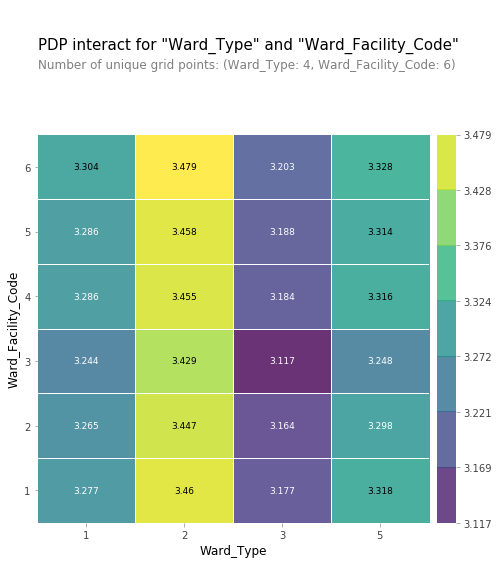

In [143]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [124]:
features = ['Severity of Illness', 'Type of Admission']

interaction = pdp_interact(
    model=xgb, 
    dataset=X_test_encoded,
    model_features=X_test_encoded.columns, 
    features=features
)

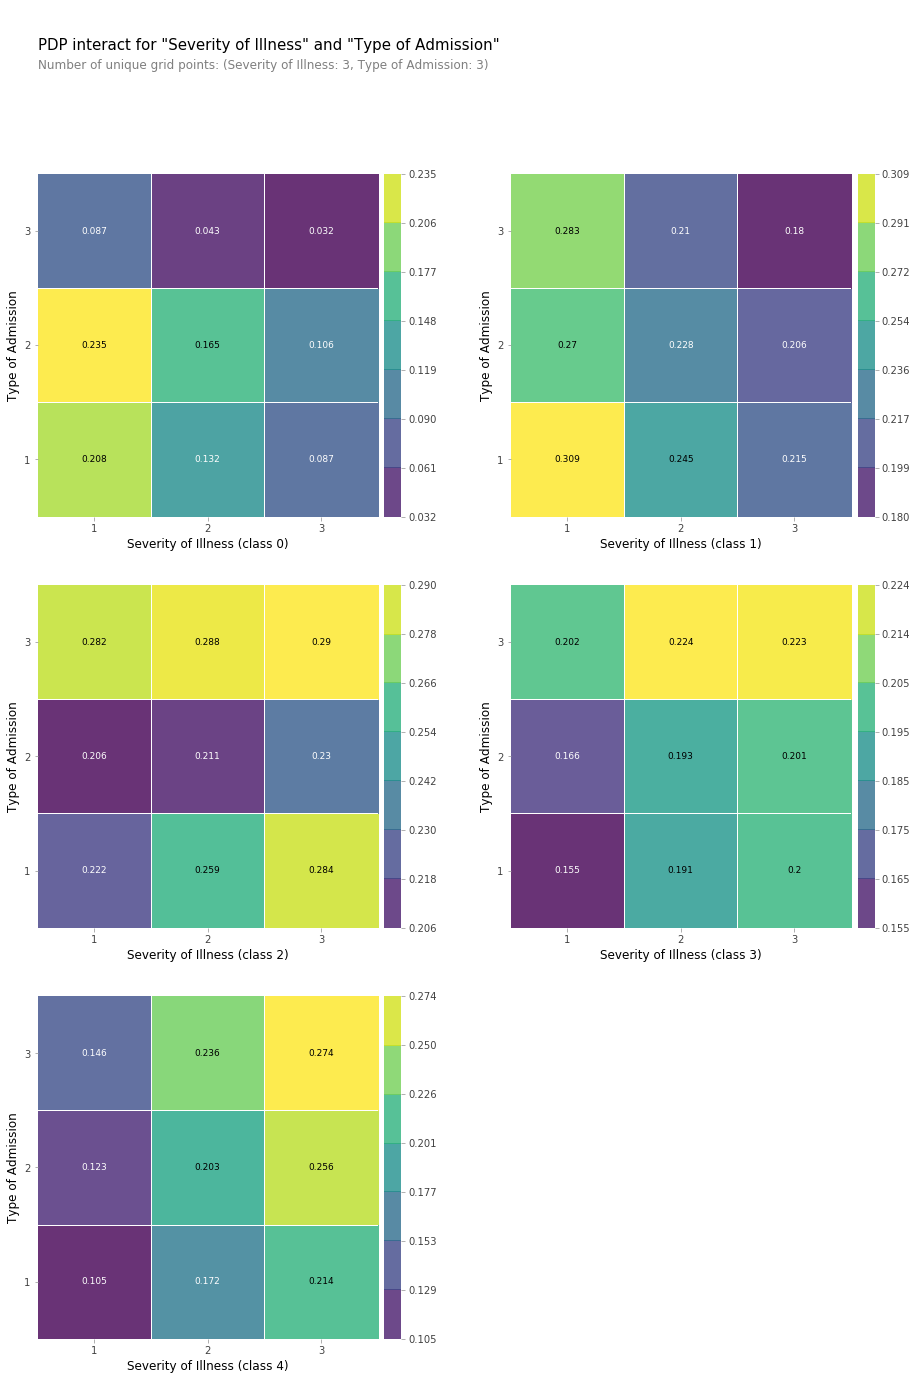

In [125]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [155]:
features = ['Severity of Illness', 'Type of Admission']

interaction = pdp_interact(
    model=xgb_reg, 
    dataset=X_test_encoded,
    model_features=X_test_encoded.columns, 
    features=features
)

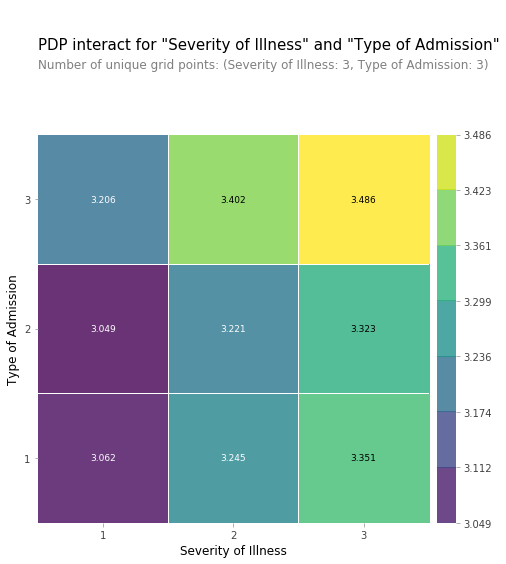

In [156]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


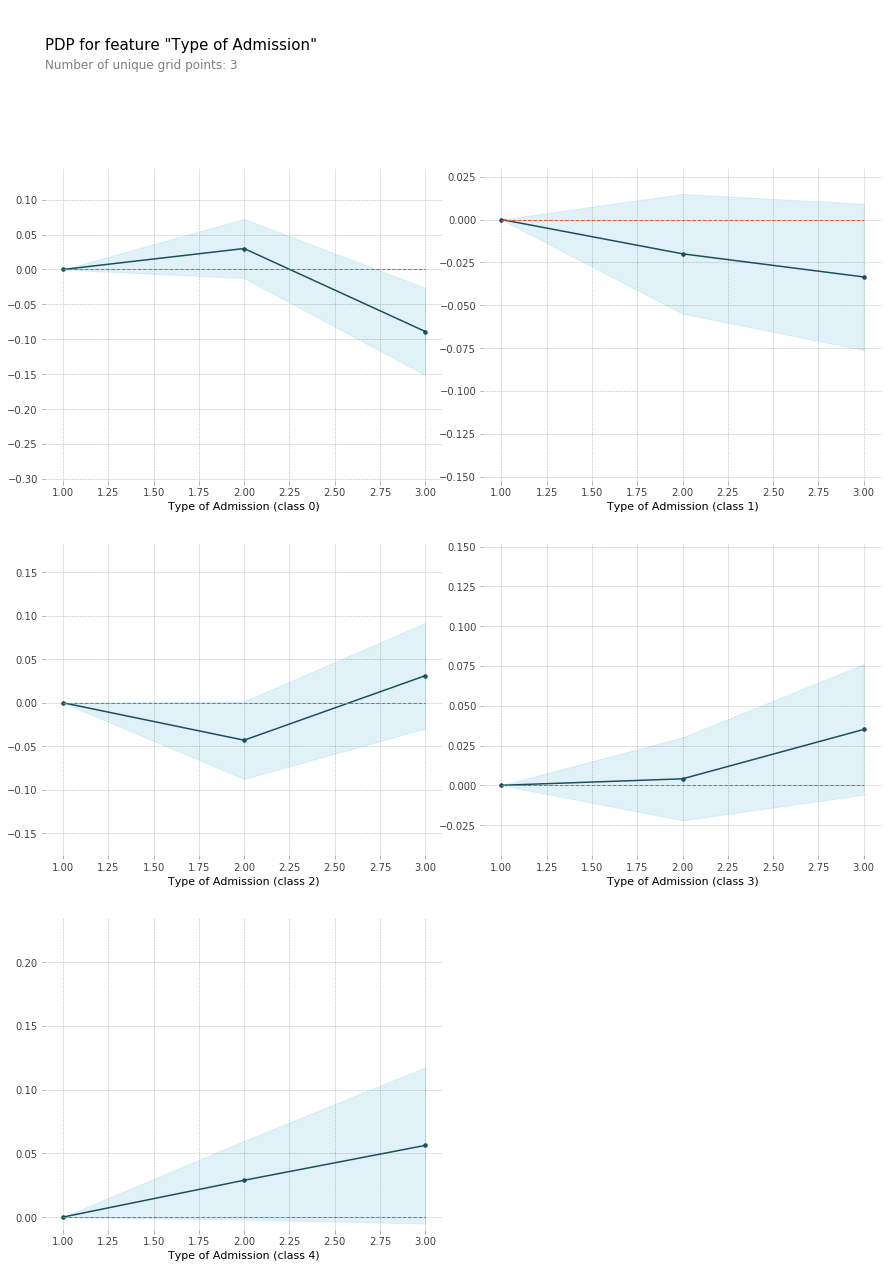

In [126]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Type of Admission'

isolated = pdp_isolate(
    model=xgb, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

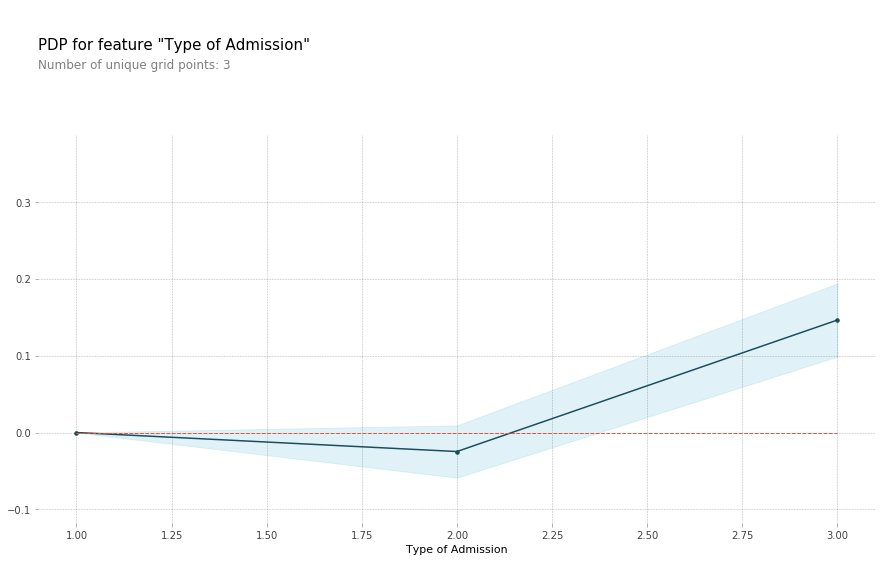

In [144]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Type of Admission'

isolated = pdp_isolate(
    model=xgb_reg, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

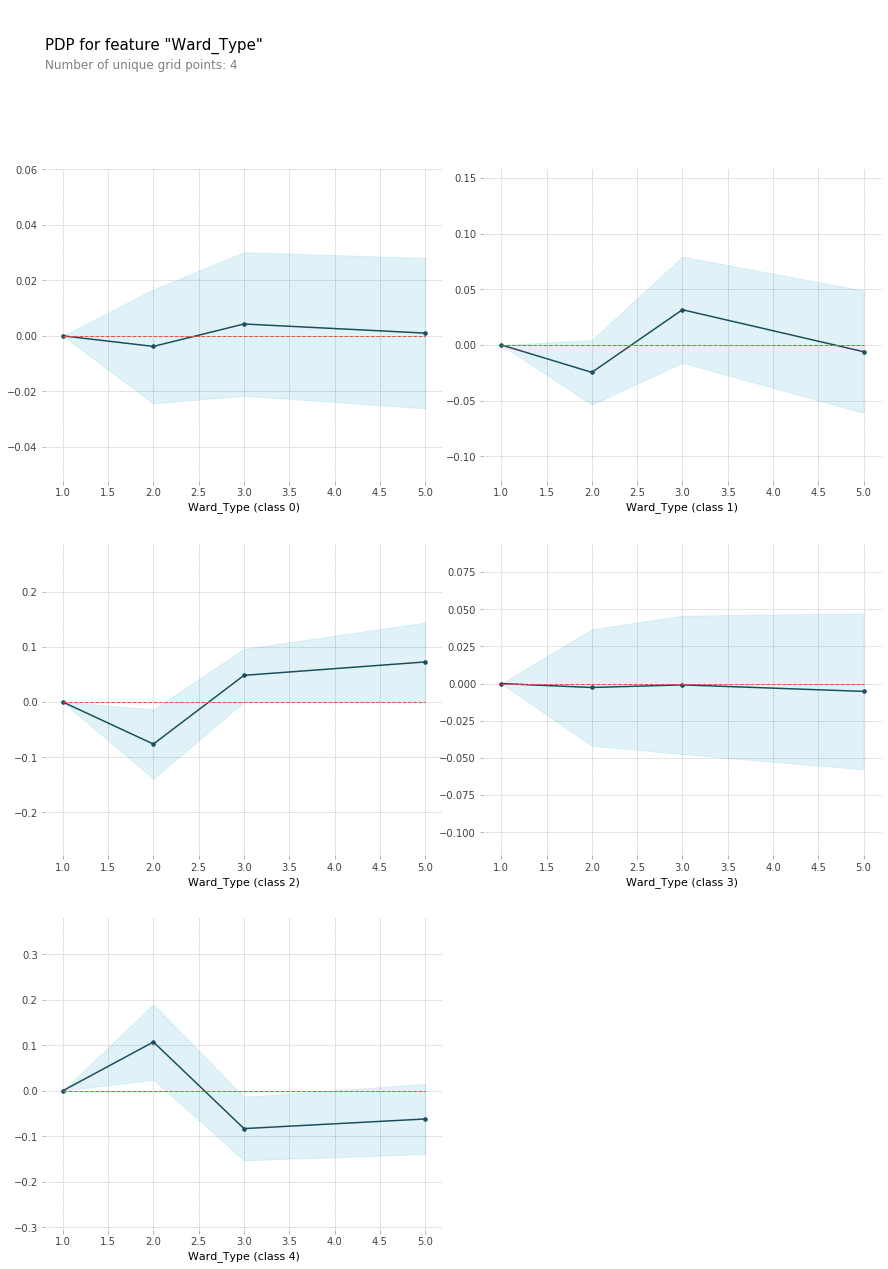

In [127]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Ward_Type'
isolated = pdp_isolate(
    model=xgb, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

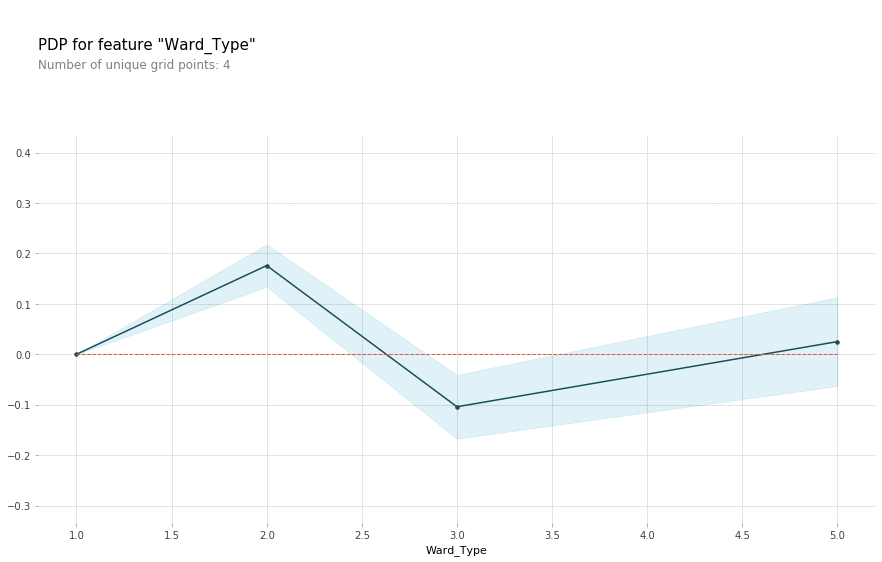

In [145]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Ward_Type'
isolated = pdp_isolate(
    model=xgb_reg, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

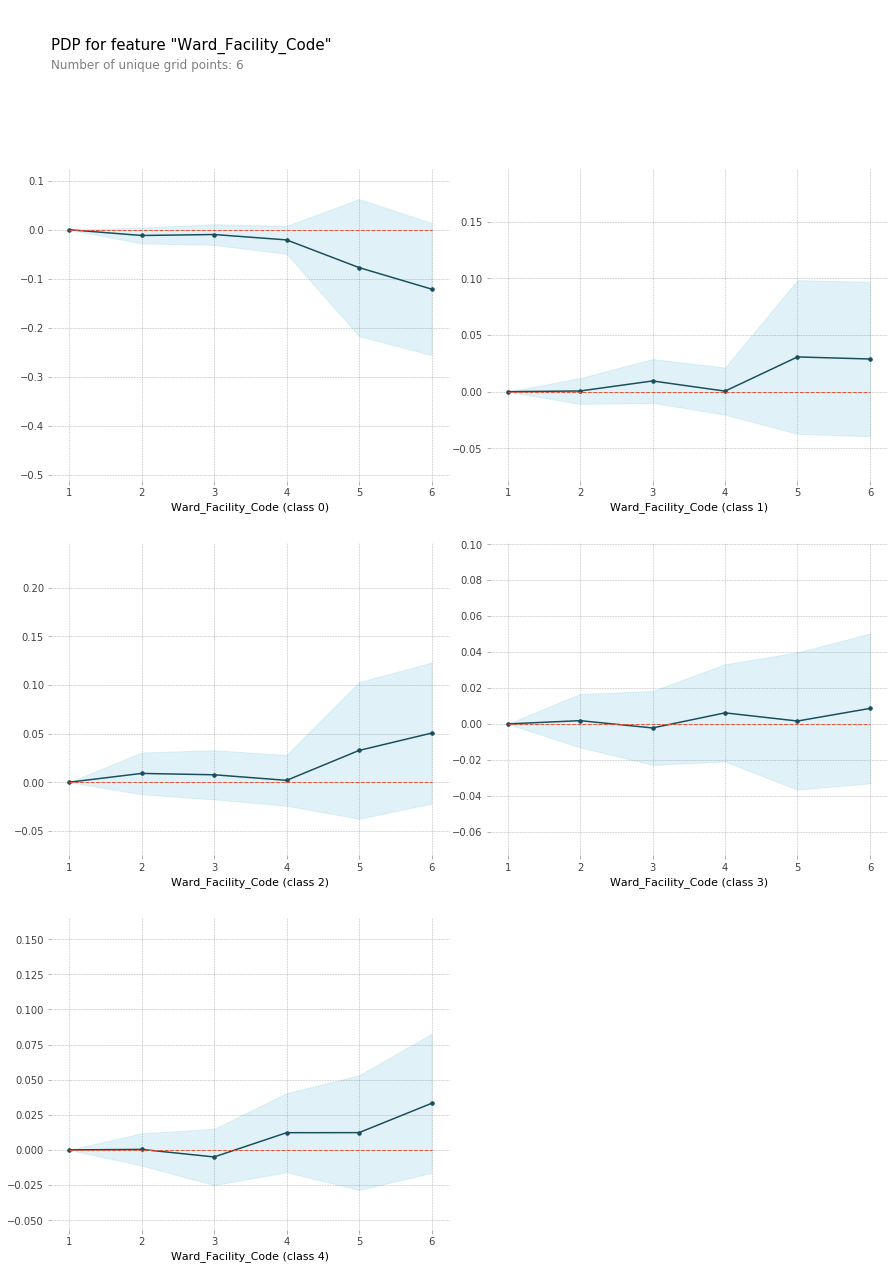

In [128]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Ward_Facility_Code'
isolated = pdp_isolate(
    model=xgb, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

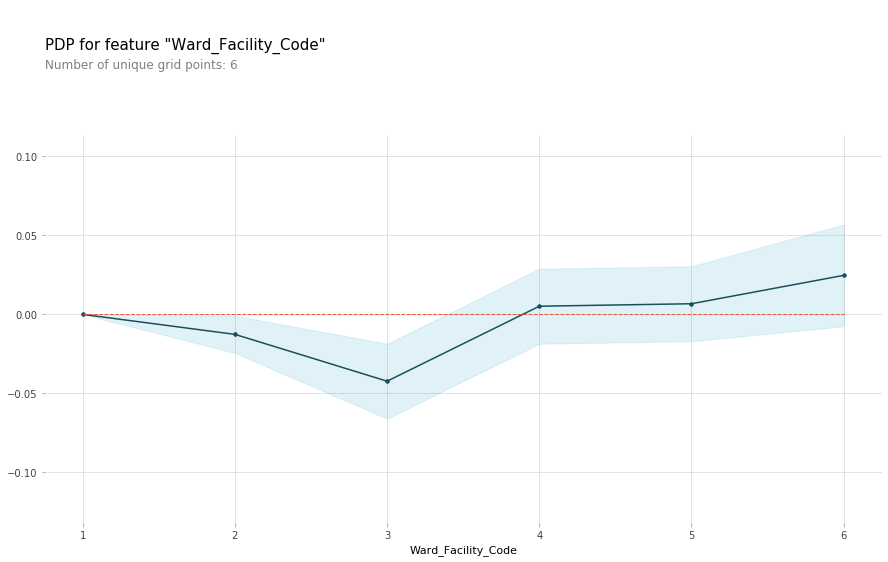

In [146]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Ward_Facility_Code'
isolated = pdp_isolate(
    model=xgb_reg, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

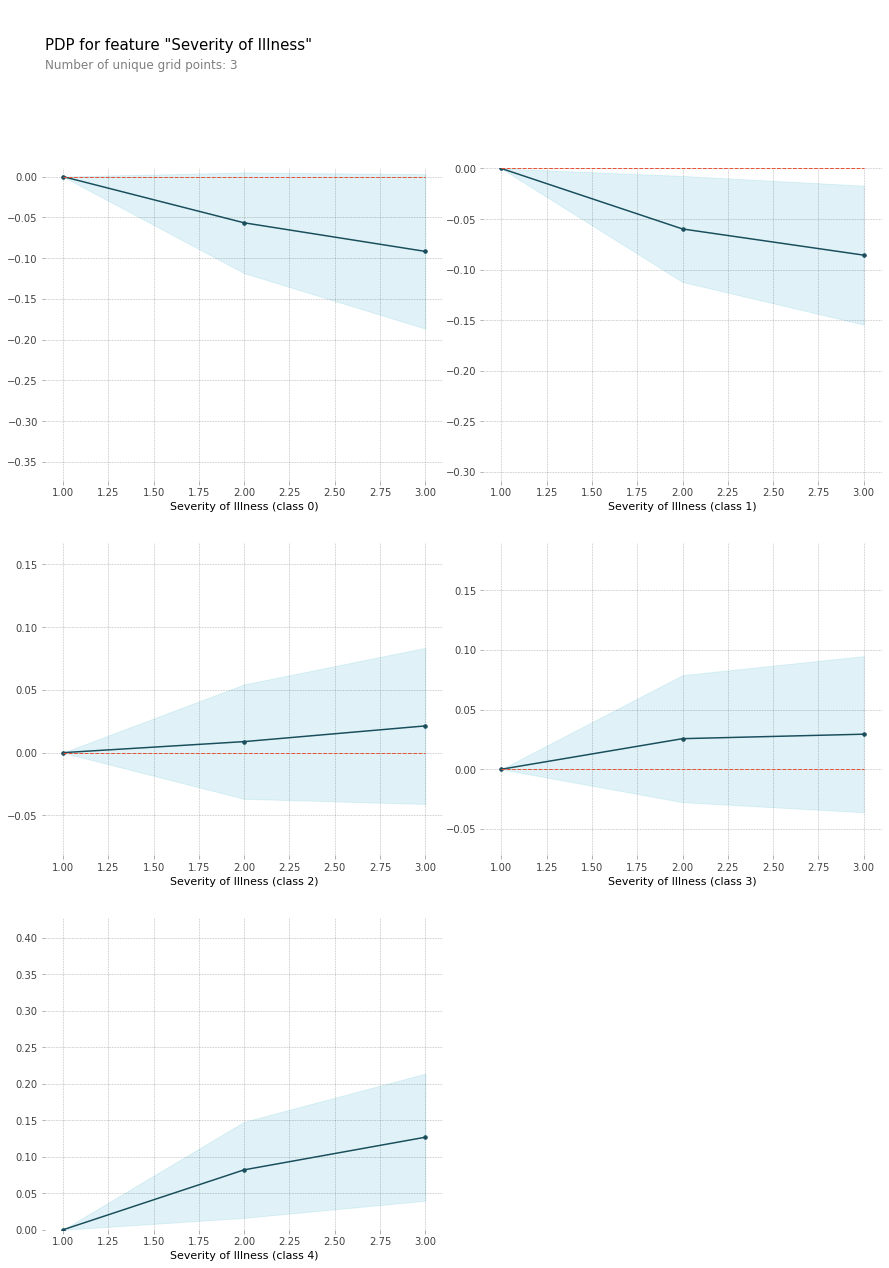

In [129]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Severity of Illness'

isolated = pdp_isolate(
    model=xgb, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

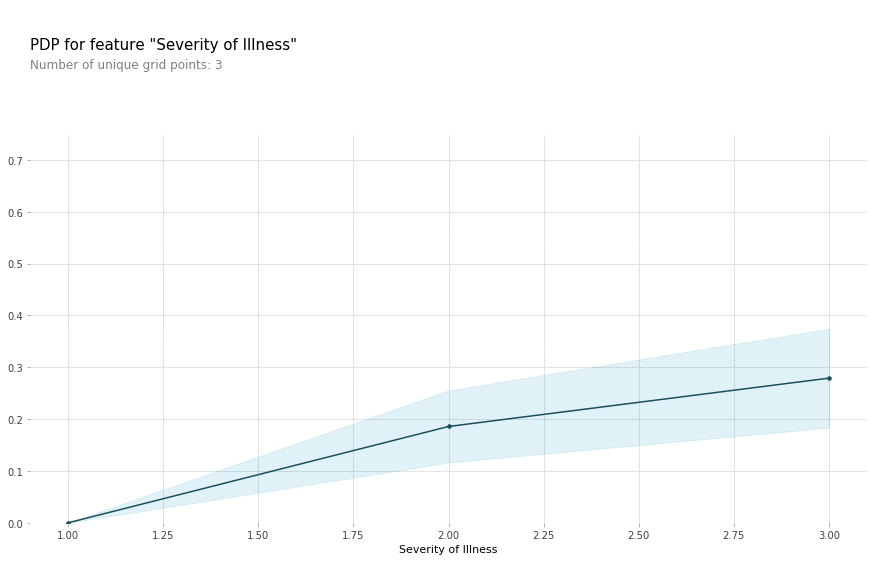

In [147]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Severity of Illness'

isolated = pdp_isolate(
    model=xgb_reg, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

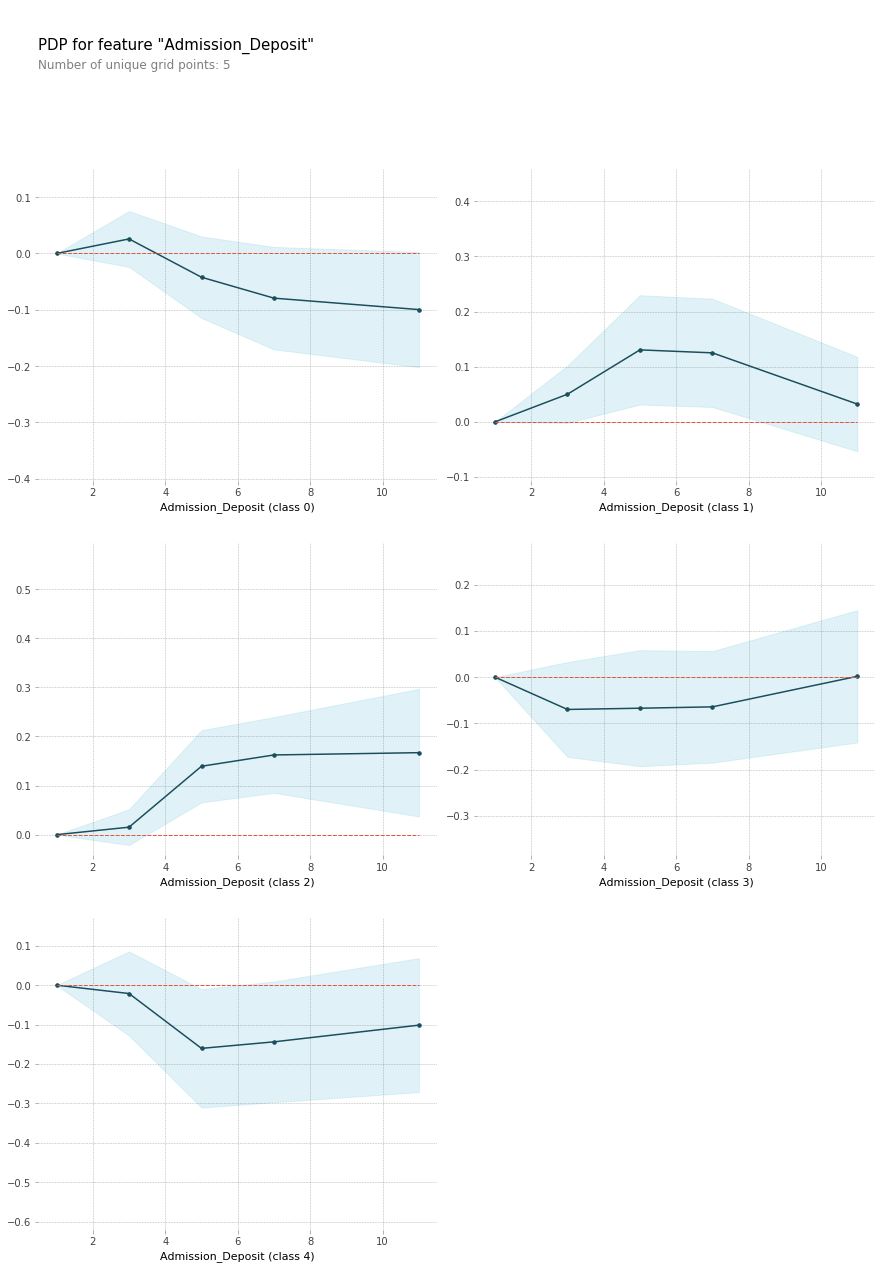

In [130]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Admission_Deposit'
isolated = pdp_isolate(
    model=xgb, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

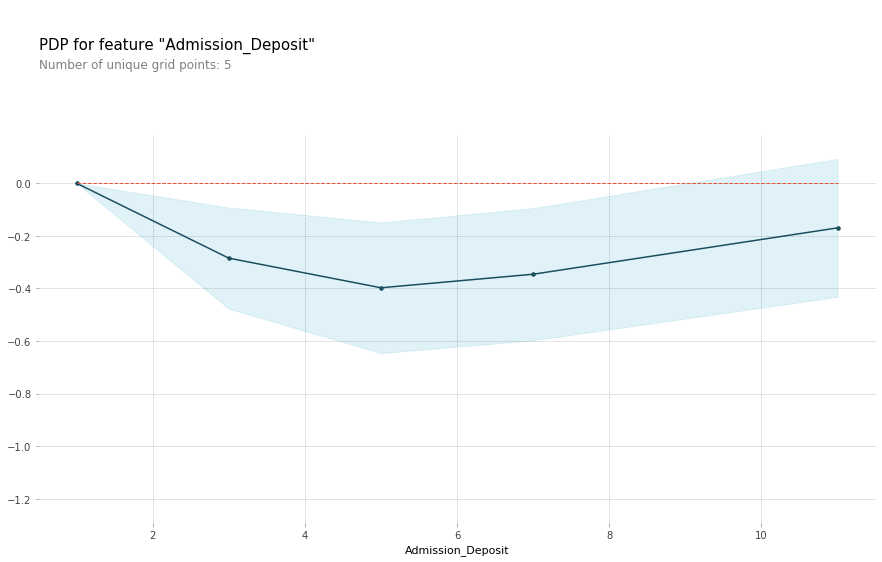

In [148]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Admission_Deposit'
isolated = pdp_isolate(
    model=xgb_reg, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

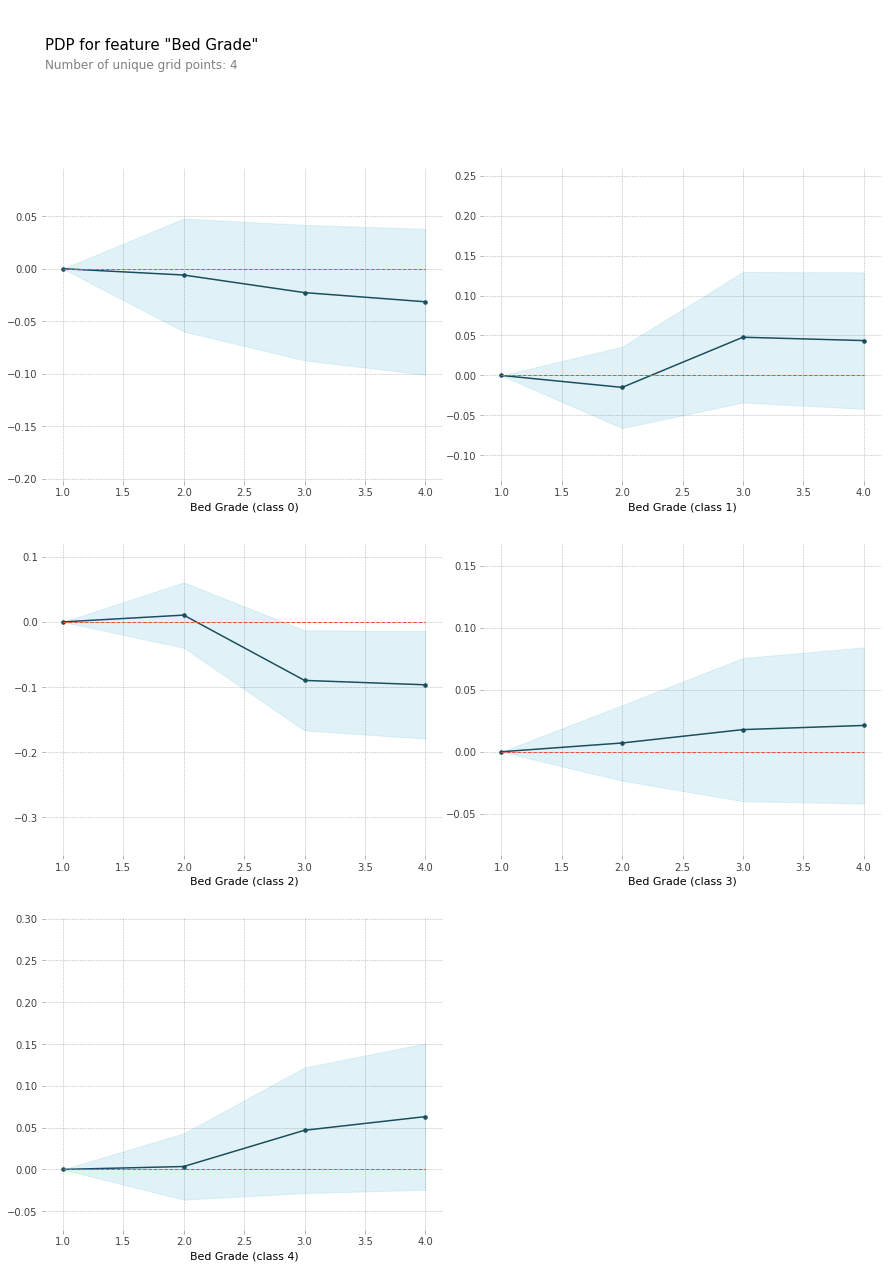

In [131]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Bed Grade'
isolated = pdp_isolate(
    model=xgb, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

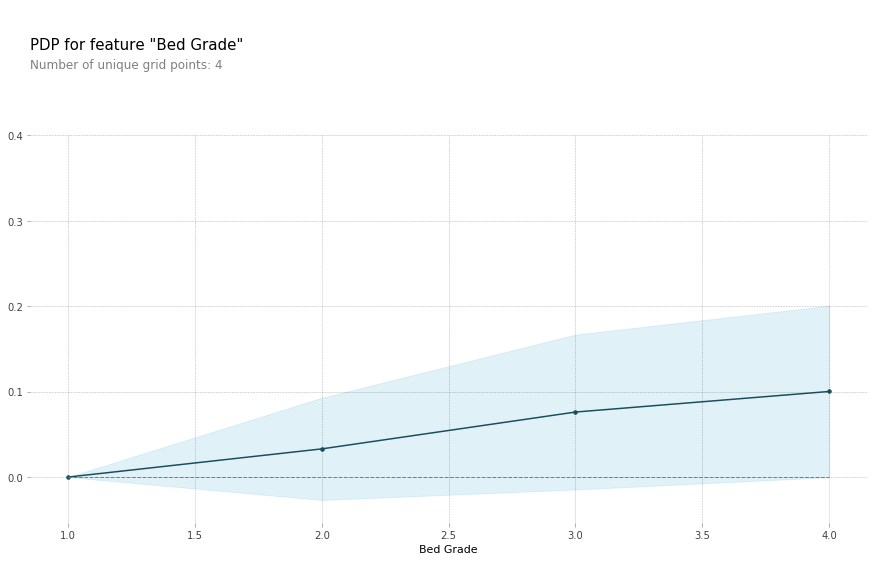

In [149]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Bed Grade'
isolated = pdp_isolate(
    model=xgb_reg, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

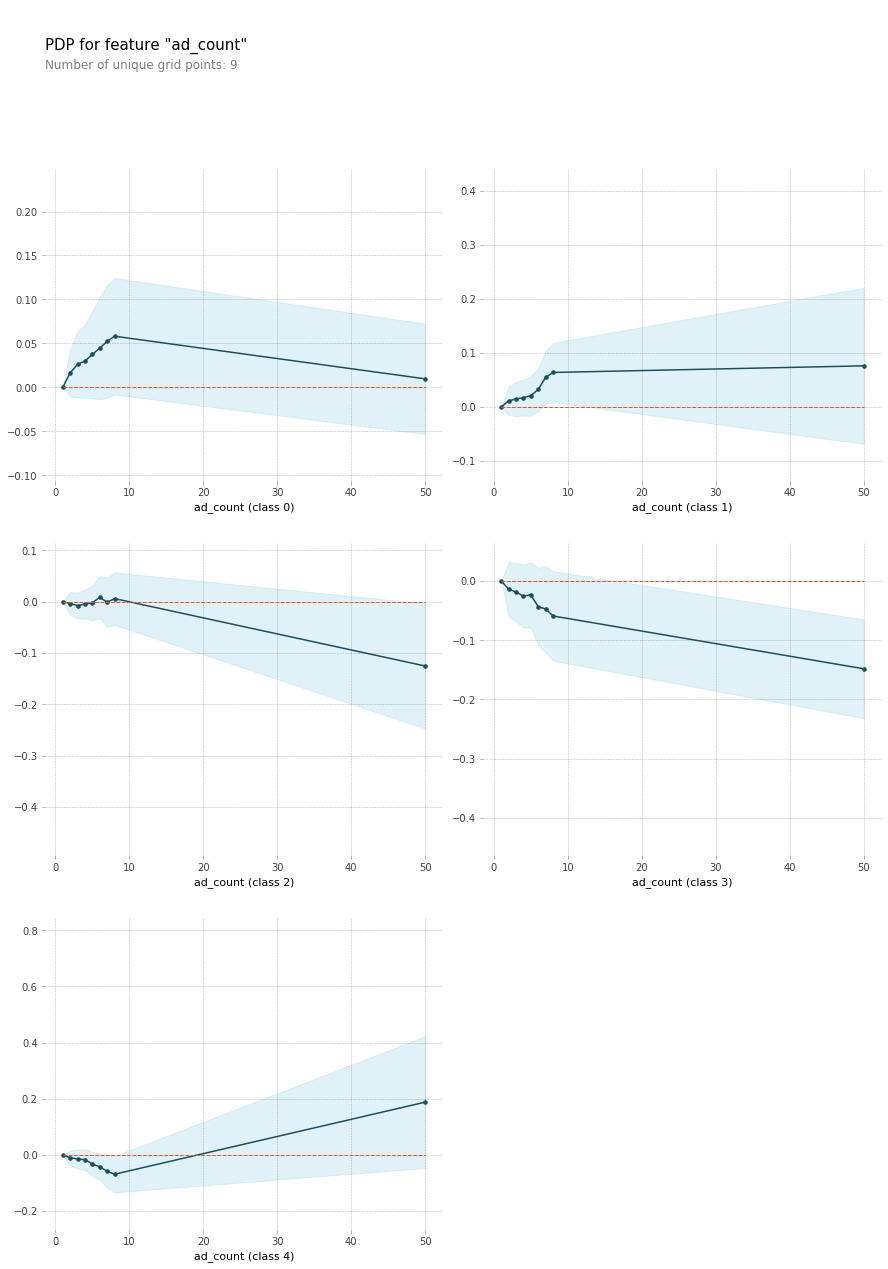

In [132]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'ad_count'
isolated = pdp_isolate(
    model=xgb, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

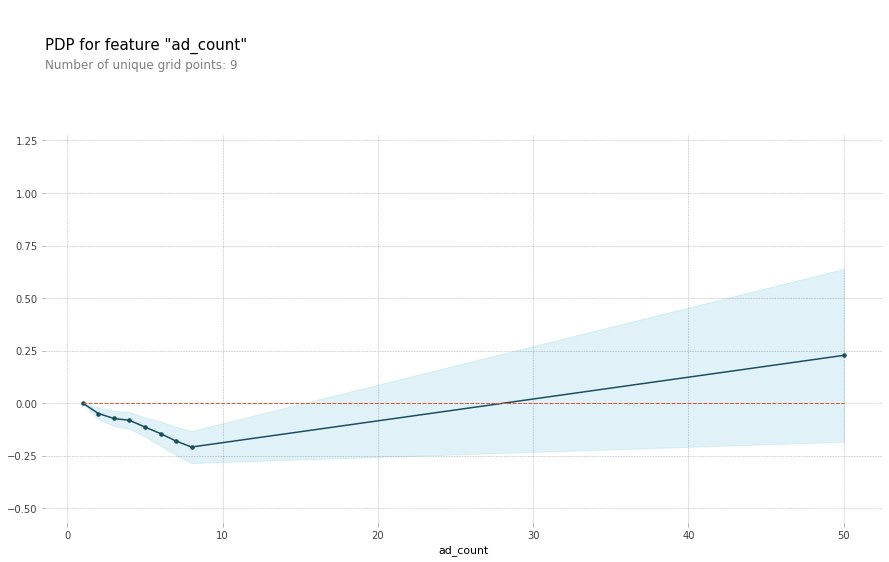

In [150]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'ad_count'
isolated = pdp_isolate(
    model=xgb_reg, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

3 - 3. SHAP

In [133]:
row = X_test_encoded.iloc[:500]

In [134]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(row)

In [135]:
class_names = ['0-10', '11-20', '21-30', '31-50', '51-']

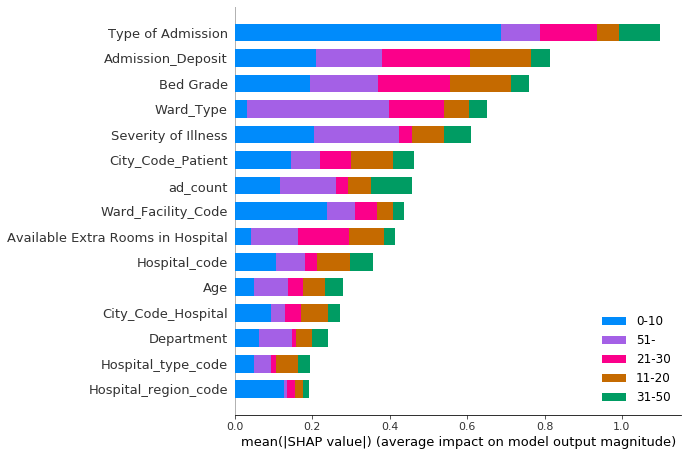

In [136]:
shap.summary_plot(shap_values, X_test_encoded.values, plot_type="bar", class_names= class_names, feature_names = X_test_encoded.columns)

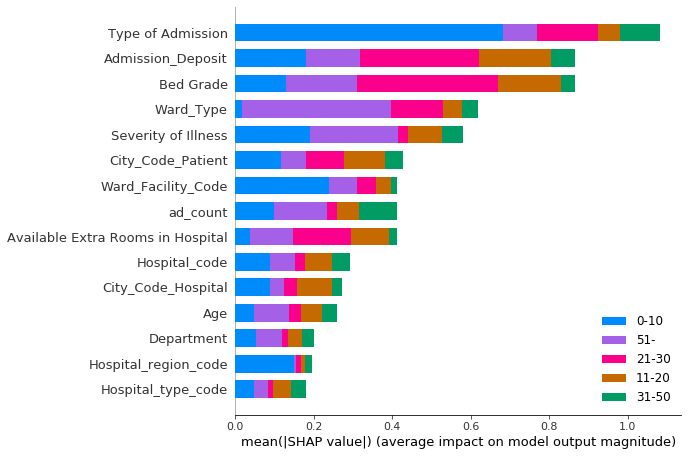

In [137]:
explainer = shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(row)

shap.summary_plot(shap_values, X_test_encoded.values, plot_type="bar", class_names= class_names, feature_names = X_test_encoded.columns)

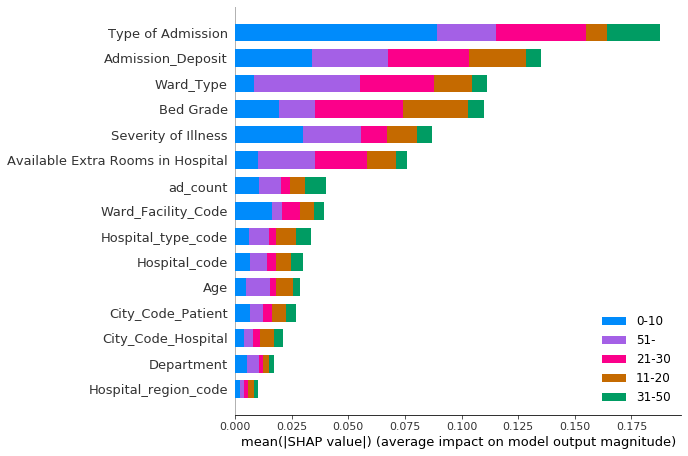

In [138]:
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(row)

shap.summary_plot(shap_values, X_test_encoded.values, plot_type="bar", class_names= class_names, feature_names = X_test_encoded.columns)

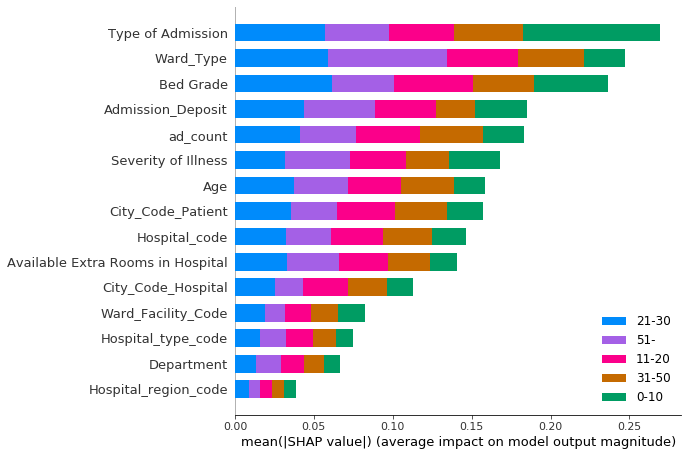

In [139]:
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(row)

shap.summary_plot(shap_values, X_test_encoded.values, plot_type="bar", class_names= class_names, feature_names = X_test_encoded.columns)

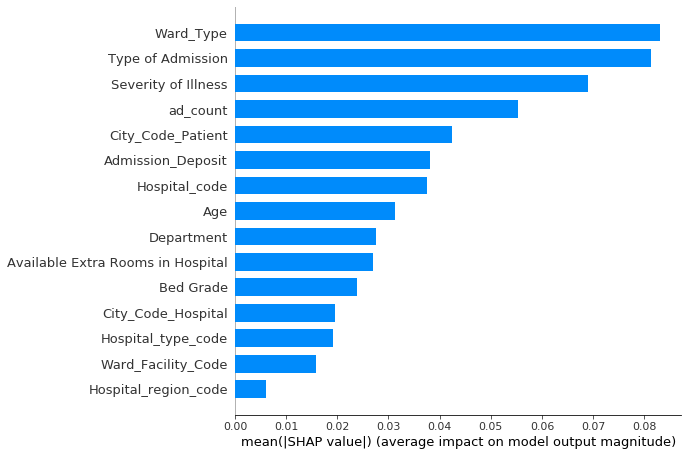

In [140]:
explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(row)

shap.summary_plot(shap_values, X_test_encoded.values, plot_type="bar", class_names= class_names, feature_names = X_test_encoded.columns)

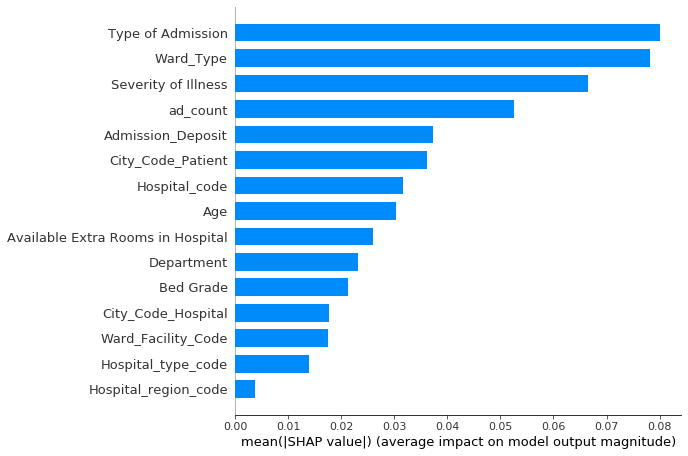

In [141]:
explainer = shap.TreeExplainer(lgbm_reg)
shap_values = explainer.shap_values(row)

shap.summary_plot(shap_values, X_test_encoded.values, plot_type="bar", class_names= class_names, feature_names = X_test_encoded.columns)